# NERSC Data Quality Exploration

In [1]:
# Imports

#from TS_Util_Clean_Data import *
import pandas as pd
import os
import sys
import numpy as np

from matplotlib import style
import matplotlib.pyplot as plt
#import matplotlib as plt
%matplotlib inline
style.use('ggplot')

# marco's folder for Library - comment out and change as needed
lib_path = os.path.abspath(os.path.join('..','gitHubRepos','Building-Analytics','building-analytics'))
lib_path = sys.path.append(lib_path)

#from TS_Util_Clean_Data import ts_util
from TS_Util_Clean_Data import TS_Util

In [2]:
## instantiate the class
#TU = ts_util()
TU = TS_Util()

In [74]:
## Additional functions developed

# TODO: pass instance of TU or remove class

def plot_print_missing(data,fileName=None):
    


    if fileName:
        TU._find_missing(data,return_bool="any").plot(figsize=(18,5), title= fileName +" Missing Data - 15 min")
        print("{} has {}/{} ({}%) missing datapoints".format(fileName,
                                                                TU.count_missing(data).max(),
                                                                data.shape[0],
                                                                1.0*TU.count_missing(data).max()/data.shape[0]*100))
    else:
        
        TU._find_missing(data,return_bool="any").plot(figsize=(18,5), title="Missing Data - 15 min")
        print("this meter has {}/{} ({}%) missing datapoints".format(TU.count_missing(data).max(),
                                                                data.shape[0],
                                                                1.0*TU.count_missing(data).max()/data.shape[0]*100))
    return

def plot_sampling(data, fileName=None):
    
    if fileName:
        data["count"].plot(figsize=(18,5),title=fileName + ": Count of Datapoints Collected - 15 min interval")
            
    else:
        data["count"].plot(figsize=(18,5),title="Count of Datapoints Collected - 15 min interval")

    return

def plot_data_summary(data, fileName=None):
    if fileName:
        data[["avg", "max", "min"]].plot(figsize=(18,5),title=fileName + ": Plot of Mean, Min, Max Power Readings")        
    else:
        data[["avg", "max", "min"]].plot(figsize=(18,5),title="Plot of Mean, Min, Max Power Readings")

    return

def data_quality_analysis(data):
    
    data = TU.remove_start_NaN(data)
    curr_meter["first_valid"] = data.first_valid_index()
    curr_meter["period_length"] = data.last_valid_index() - data.first_valid_index()
    curr_meter["missing_n"] = TU.count_missing(data, output="number").values[0]
    curr_meter["missing_perc"] = TU.count_missing(data, output="percent").values[0]    
    curr_meter["zero_n"] = TU.count_if(data, condition="=", val=0, output="number").values[0] 
    curr_meter["zero_perc"] = TU.count_if(data, condition="=", val=0, output="percent").values[0] 
    curr_meter["negative_n"] = TU.count_if(data, condition="<", val=0, output="number").values[0] 
    curr_meter["negative_perc"] = TU.count_if(data, condition="<", val=0, output="percent").values[0] 
    curr_meter["outliers_n"] = TU.count_outliers(data, method="std", coeff=3, output="number").values[0] 
    curr_meter["outliers_perc"] = TU.count_outliers(data, method="std", coeff=3, output="percent").values[0] 
    
    return curr_meter

def max_min_diff(data, output="count"):
    
    if output == "count":
        
        diff = (data["max"] - data["min"]).mean()
    
    elif output == "percentage":
    
        diff = ((data["max"] - data["min"])/data["avg"]).mean()*100
    
    return diff


## Test Meter 1

### Aggregated meter

In [75]:
## import and format csv

meter_resampled = TU.load_TS("NERSC_test_meter_averages.csv","NERSC_test")

# verify types and print head
print meter_resampled.dtypes
meter_resampled.head()

count      int64
avg      float64
max      float64
min      float64
sum      float64
dtype: object


count            avg            max            min  \
datetime                                                                  
2017-07-24 21:00:00    131  180342.856512  182262.156250  178315.453125   
2017-07-24 21:15:00    134  179730.395989  181825.312500  178125.515625   
2017-07-24 21:30:00    130  179197.710938  181228.953125  177585.453125   
2017-07-24 21:45:00    132  179769.177794  182218.515625  177786.125000   
2017-07-24 22:00:00    133  179395.921875  181988.890625  177735.593750   

                              sum  
datetime                           
2017-07-24 21:00:00  2.362491e+07  
2017-07-24 21:15:00  2.408387e+07  
2017-07-24 21:30:00  2.329570e+07  
2017-07-24 21:45:00  2.372953e+07  
2017-07-24 22:00:00  2.385966e+07

this meter has 56/2883 (1.94242108914%) missing datapoints


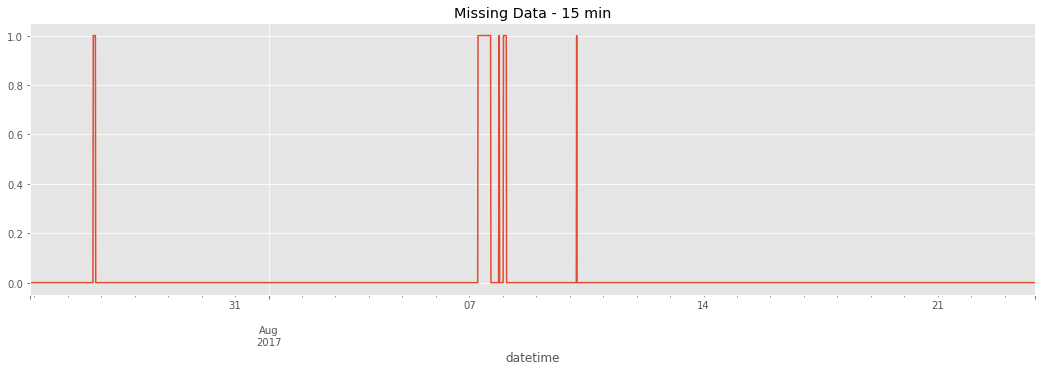

In [76]:
plot_print_missing(meter_resampled)

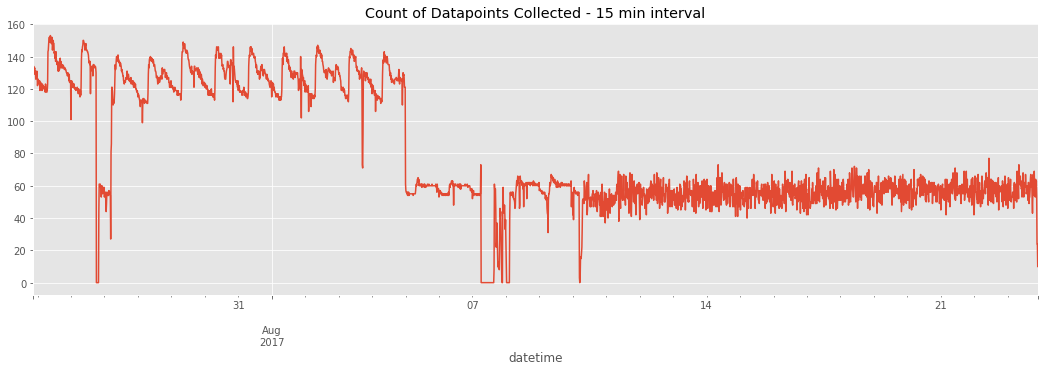

In [77]:
# show sampling frequency
plot_sampling(meter_resampled)

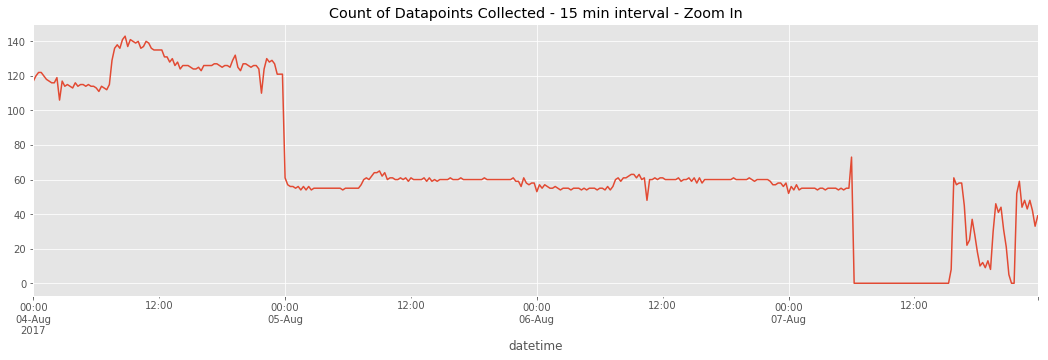

In [78]:
# zoom in into the sampling drop
meter_resampled.loc["2017-08-04":"2017-08-07","count"].plot(figsize=(18,5),title="Count of Datapoints Collected - 15 min interval - Zoom In")

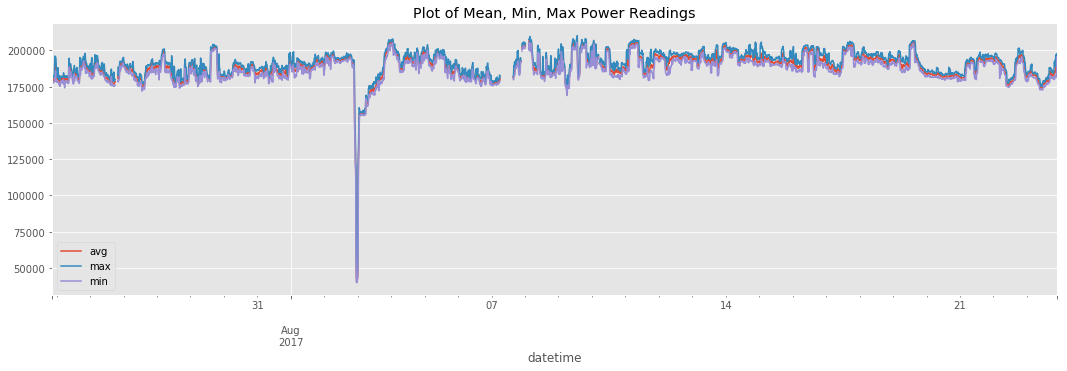

In [79]:
plot_data_summary(meter_resampled)

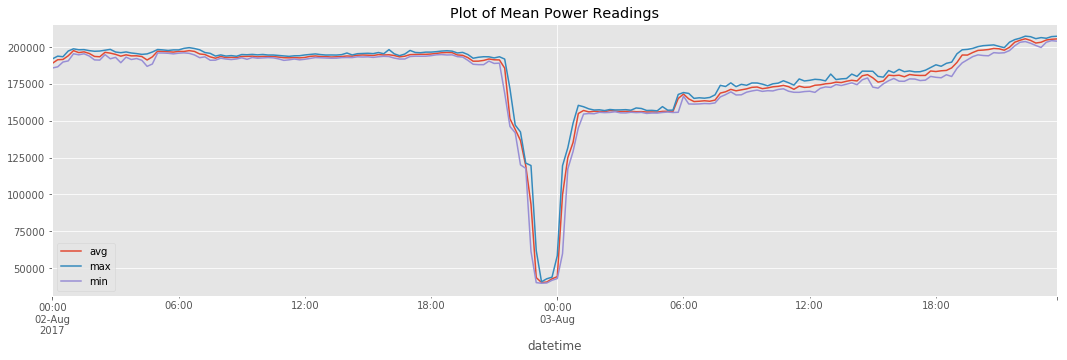

In [80]:
meter_resampled.loc["2017-08-02":"2017-08-03",["avg", "max", "min"]].plot(figsize=(18,5),title="Plot of Mean Power Readings")

### Raw meter

In [81]:
## import and format csv
path_raw = os.path.join("NERSC_test","NERSC_test_meter_raw.csv")
meter_raw = pd.read_csv(path_raw, header=None) # this one is formatted differently
# name columns
meter_raw.columns = ["datetime","date","time","uuid","measurement", "value", "unit"]
# datetime format
meter_raw["datetime"] = pd.to_datetime(meter_raw["datetime"])
meter_raw.index = meter_raw["datetime"]
meter_raw.drop("datetime",axis=1,inplace=True)
# verify types and print head
print meter_raw.dtypes
meter_raw.head()

date            object
time            object
uuid            object
measurement     object
value          float64
unit            object
dtype: object


date       time             uuid  measurement  \
datetime                                                                    
2017-08-10 00:27:30   2017-08-10   00:27:30   p590a22a-pqube   Real Power   
2017-08-10 00:28:16   2017-08-10   00:28:16   p590a22a-pqube   Real Power   
2017-08-10 00:30:23   2017-08-10   00:30:23   p590a22a-pqube   Real Power   
2017-08-10 00:39:00   2017-08-10   00:39:00   p590a22a-pqube   Real Power   
2017-08-10 00:41:01   2017-08-10   00:41:01   p590a22a-pqube   Real Power   

                         value    unit  
datetime                                
2017-08-10 00:27:30  203566.10   Watts  
2017-08-10 00:28:16  202789.21   Watts  
2017-08-10 00:30:23  203171.42   Watts  
2017-08-10 00:39:00  199702.98   Watts  
2017-08-10 00:41:01  199232.87   Watts

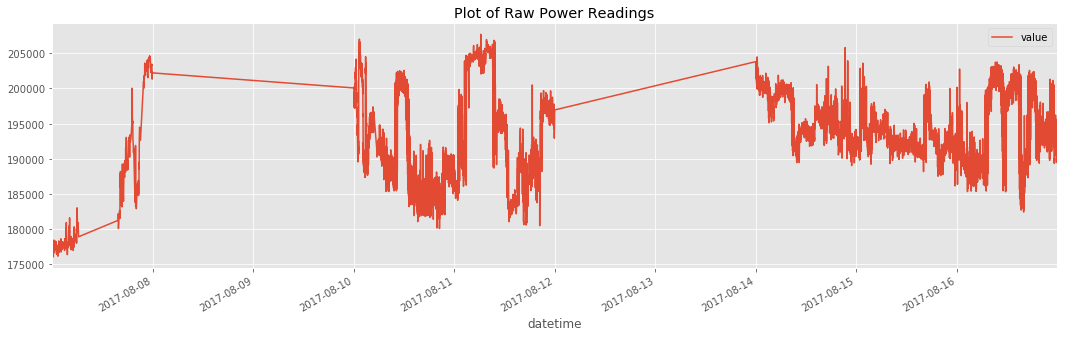

In [82]:
meter_raw.sort_index().loc[:,["value"]].plot(figsize=(18,5),title="Plot of Raw Power Readings")

## NERSC_data1 analysis

### Aggregated Data

In [89]:
## read files in the folder and create lists and table
folder = "NERSC_data1"
files = os.listdir(folder)
files_aggregated = [fileName for fileName in files  if "-15min" in fileName]
files_raw = [fileName for fileName in files  if "-15min" not in fileName]
results_table = pd.DataFrame(files_aggregated, columns=["meter_file"])

In [90]:
## overall analysis

temp = pd.DataFrame()
metrics = {}
for fileName in files_aggregated:
    curr_meter = {}
    data = TU.load_TS(fileName,folder)
    temp = data
    metrics[fileName] = data_quality_analysis(pd.DataFrame(data["avg"]))
    
results = pd.DataFrame.from_dict(metrics,orient='columns').T
results

first_valid missing_n missing_perc  \
590a19a-15min.csv        2017-08-27 20:45:00       112      7.77238   
590a20a-15min.csv        2017-08-27 20:45:00       112      7.77238   
590a21a-15min.csv        2017-08-27 20:45:00       111      7.70298   
590a22a-15min.csv        2017-08-27 20:45:00       111      7.70298   
pdu-10 output-15min.csv  2017-08-27 20:45:00        66      4.58015   
pdu-11 output-15min.csv  2017-08-27 20:45:00        67      4.64955   
pdu-12 output-15min.csv  2017-08-27 20:45:00        69      4.78834   
pdu-13 output-15min.csv  2017-08-27 20:45:00        69      4.78834   
pdu-21 output-15min.csv  2017-08-27 20:45:00       111      7.70298   
pdu-22 output-15min.csv  2017-08-27 20:45:00       111      7.70298   
pdu-25 output-15min.csv  2017-08-27 20:45:00       112      7.77238   
pdu-28 output-15min.csv  2017-08-27 20:45:00       112      7.77238   
pdu-30 output-15min.csv  2017-08-27 20:45:00       110      7.63359   
pdu-32 output-15min.csv  2017-08-27 20:45:00       112      7.77238   
pdu-33 output-15min.csv  2017-08-27 20:45:00       111      7.70298   
pdu-34 output-15min.csv  2017-08-27 20:45:00       111      7.70298   
pdu-36 output-15min.csv  2017-08-27 20:45:00       112      7.77238   
pdu-37 output-15min.csv  2017-08-27 21:00:00       111      7.70833   
ups-1 output-15min.csv   2017-08-27 20:45:00       104      7.21721   
ups-2 output-15min.csv   2017-08-27 20:45:00       104      7.21721   

                        negative_n negative_perc outliers_n outliers_perc  \
590a19a-15min.csv                0             0          8       0.55517   
590a20a-15min.csv                0             0         30       2.08189   
590a21a-15min.csv                0             0          0             0   
590a22a-15min.csv                0             0          0             0   
pdu-10 output-15min.csv          0             0         43       2.98404   
pdu-11 output-15min.csv          0             0         53         3.678   
pdu-12 output-15min.csv          0             0         26        1.8043   
pdu-13 output-15min.csv          0             0         37       2.56766   
pdu-21 output-15min.csv          0             0          0             0   
pdu-22 output-15min.csv          0             0          0             0   
pdu-25 output-15min.csv          0             0          0             0   
pdu-28 output-15min.csv          0             0         56       3.88619   
pdu-30 output-15min.csv          0             0          0             0   
pdu-32 output-15min.csv          0             0          0             0   
pdu-33 output-15min.csv          0             0          0             0   
pdu-34 output-15min.csv          0             0          0             0   
pdu-36 output-15min.csv          0             0          9      0.624566   
pdu-37 output-15min.csv          0             0          7      0.486111   
ups-1 output-15min.csv           0             0          3      0.208189   
ups-2 output-15min.csv           0             0          0             0   

                            period_length zero_n zero_perc  
590a19a-15min.csv        15 days 00:00:00      0         0  
590a20a-15min.csv        15 days 00:00:00      0         0  
590a21a-15min.csv        15 days 00:00:00      0         0  
590a22a-15min.csv        15 days 00:00:00      0         0  
pdu-10 output-15min.csv  15 days 00:00:00      0         0  
pdu-11 output-15min.csv  15 days 00:00:00      0         0  
pdu-12 output-15min.csv  15 days 00:00:00      0         0  
pdu-13 output-15min.csv  15 days 00:00:00      0         0  
pdu-21 output-15min.csv  15 days 00:00:00      0         0  
pdu-22 output-15min.csv  15 days 00:00:00      0         0  
pdu-25 output-15min.csv  15 days 00:00:00      0         0  
pdu-28 output-15min.csv  15 days 00:00:00      0         0  
pdu-30 output-15min.csv  15 days 00:00:00      0         0  
pdu-32 output-15min.csv  15 days 00:00:00      0         0  
pdu-33 o

590a19a-15min.csv


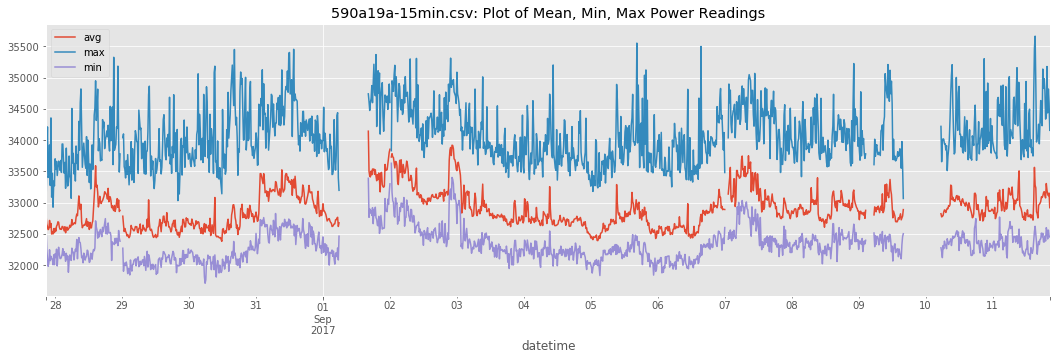

590a20a-15min.csv


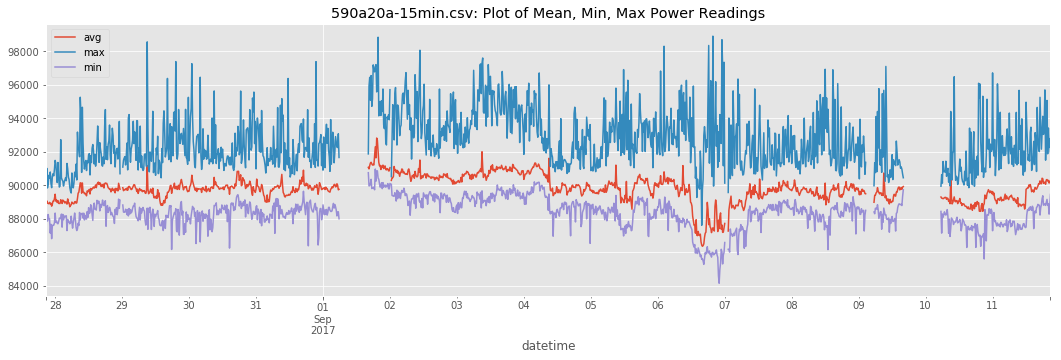

590a21a-15min.csv


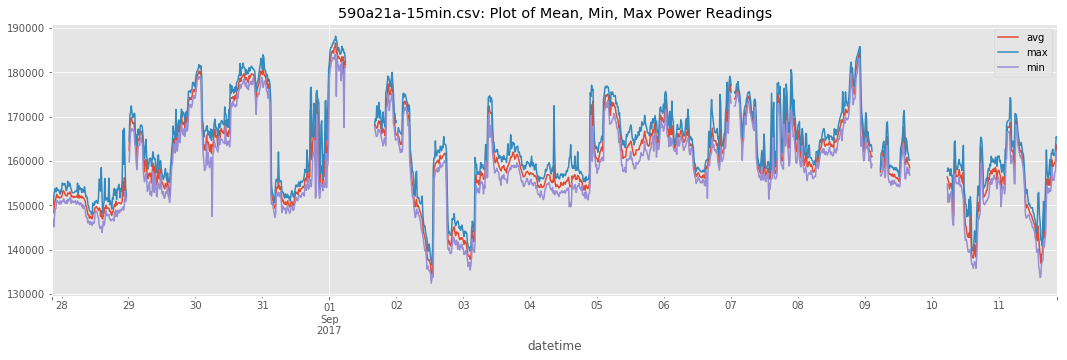

590a22a-15min.csv


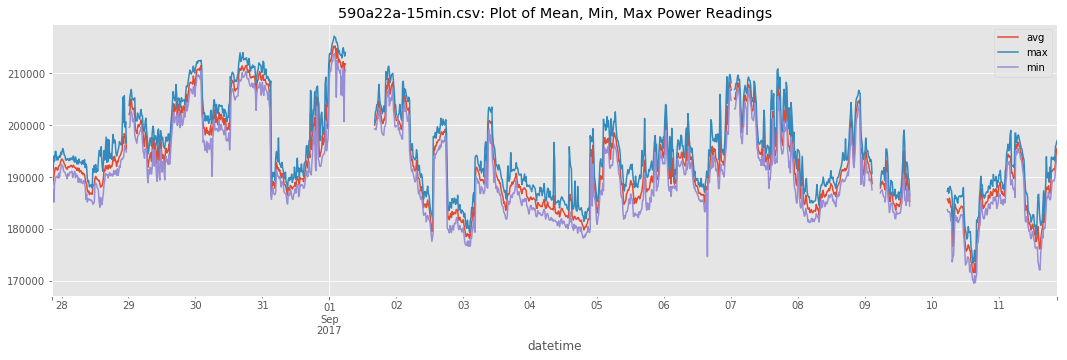

pdu-10 output-15min.csv


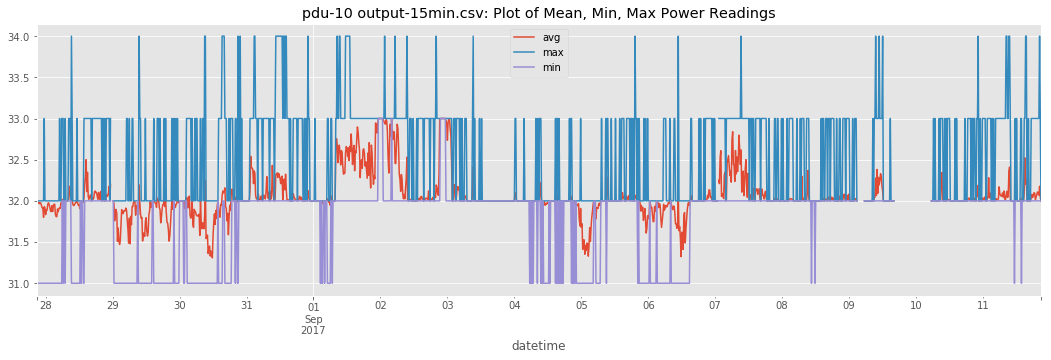

pdu-11 output-15min.csv


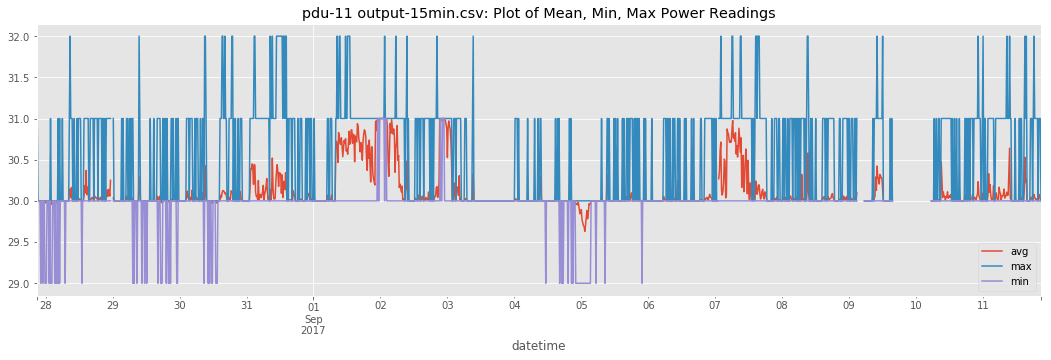

pdu-12 output-15min.csv


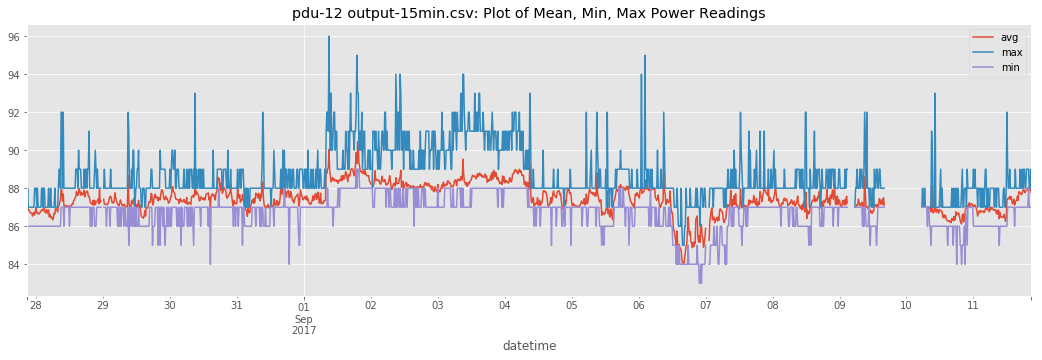

pdu-13 output-15min.csv


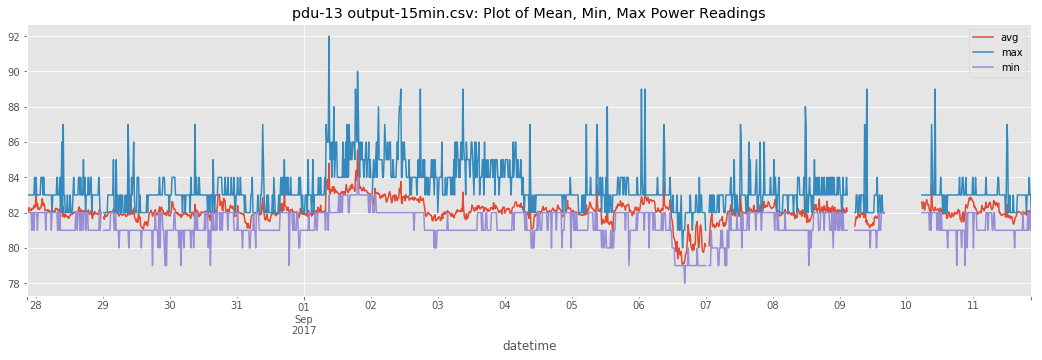

pdu-21 output-15min.csv


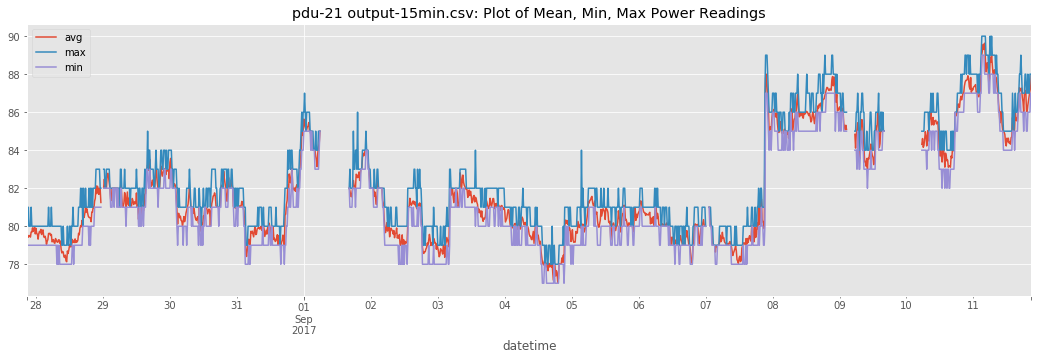

pdu-22 output-15min.csv


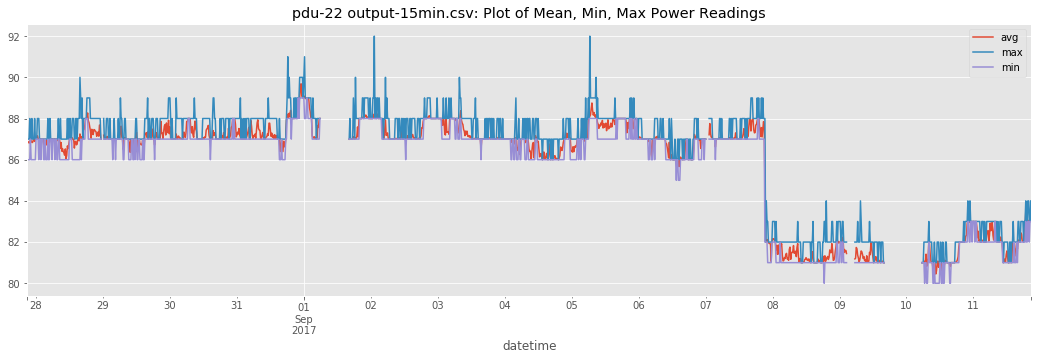

pdu-25 output-15min.csv


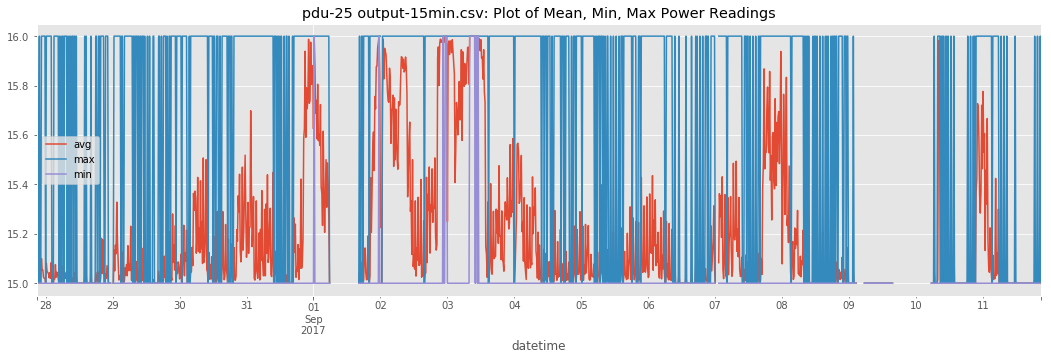

pdu-28 output-15min.csv


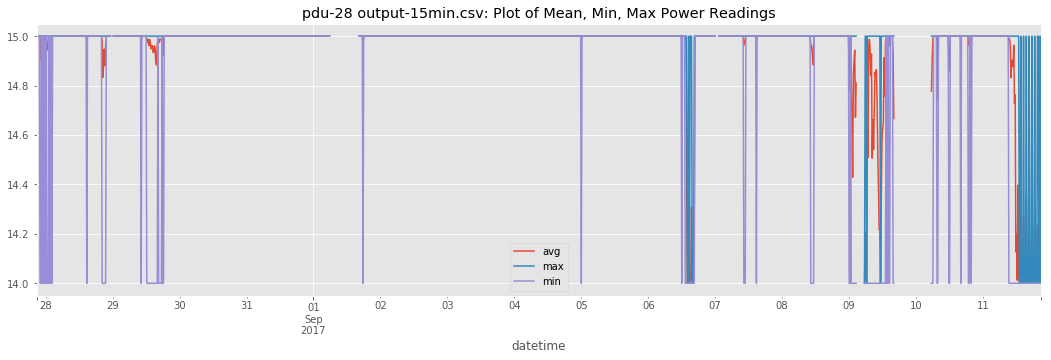

pdu-30 output-15min.csv


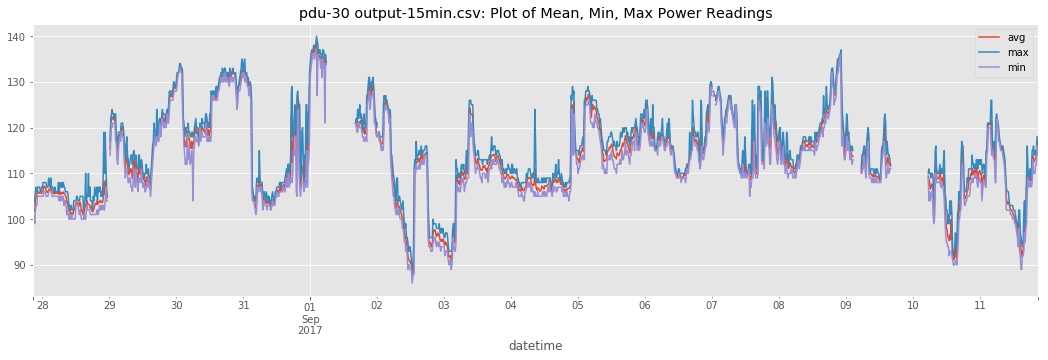

pdu-32 output-15min.csv


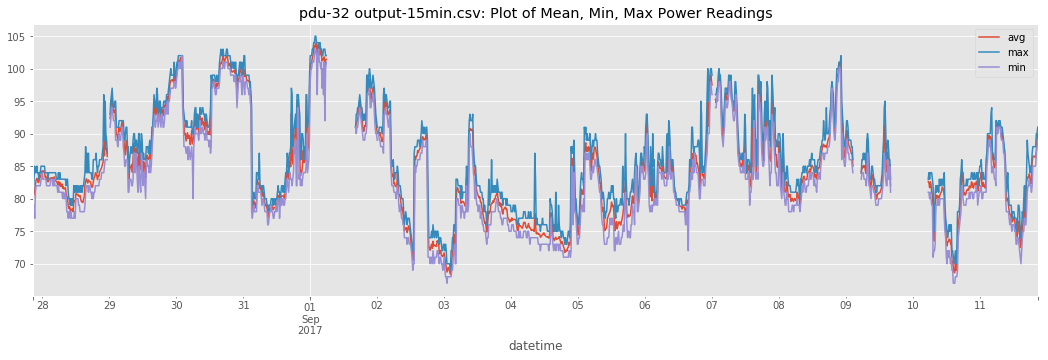

pdu-33 output-15min.csv


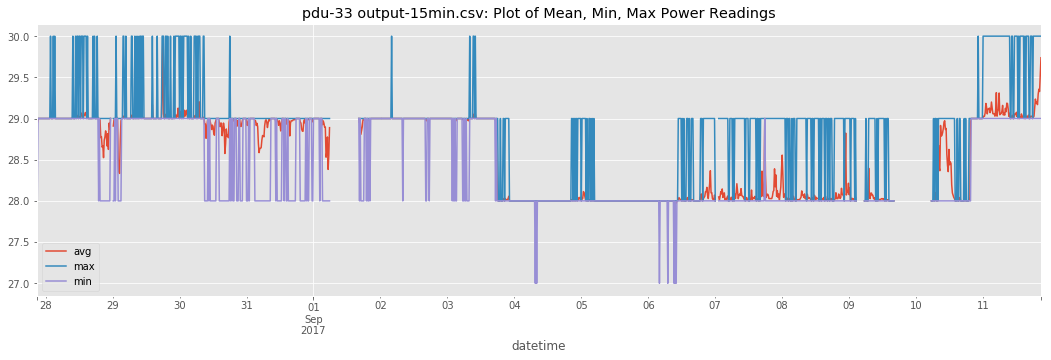

pdu-34 output-15min.csv


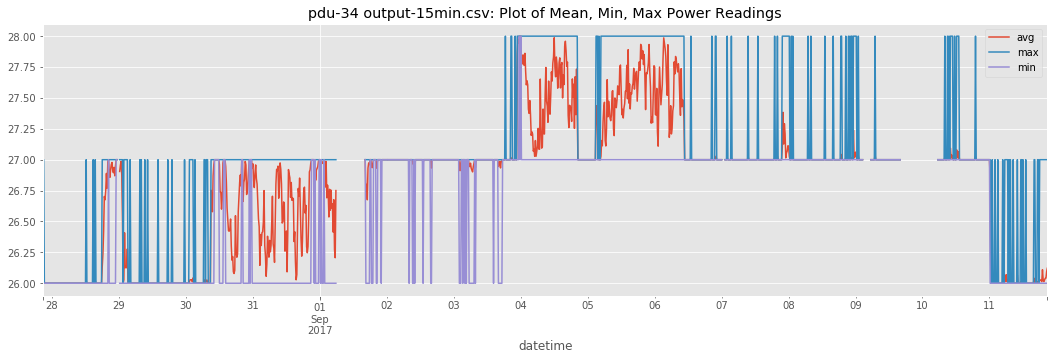

pdu-36 output-15min.csv


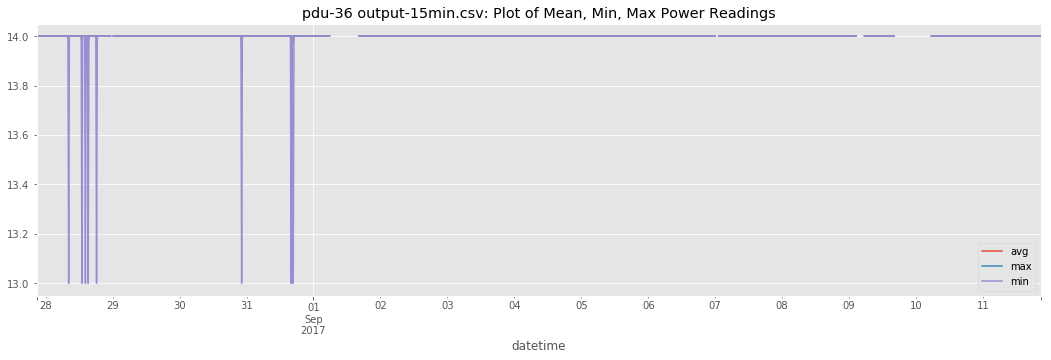

pdu-37 output-15min.csv


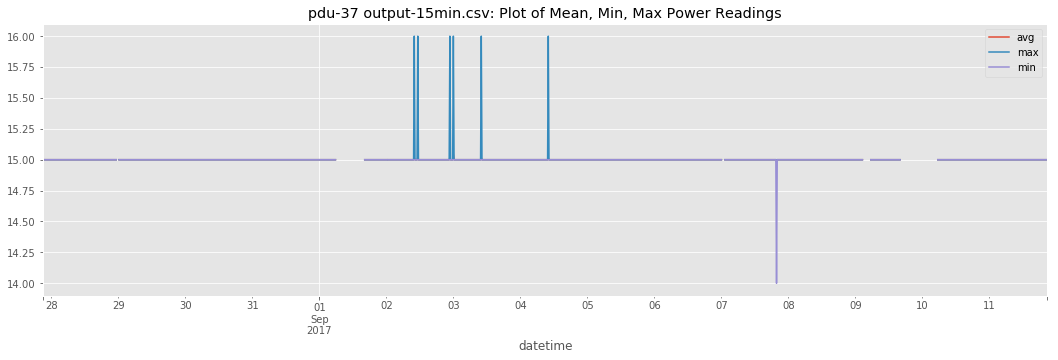

ups-1 output-15min.csv


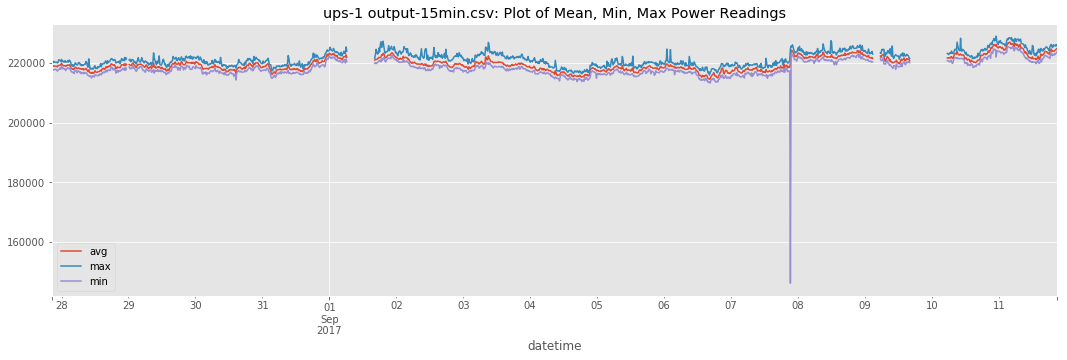

ups-2 output-15min.csv


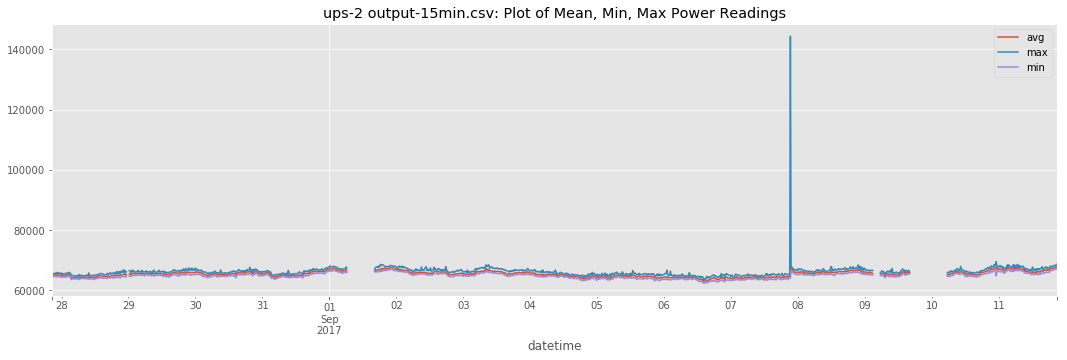

In [91]:
# dynamic analysis
for fileName in files_aggregated:
    data = TU.load_TS(fileName,folder)
    print(fileName)
    #plot_print_missing(data,fileName)
    #plt.show()
    #plot_sampling(data,fileName)
    #plt.show()
    plot_data_summary(data,fileName)
    #(data["max"]-data["min"]).plot(figsize=(18,5))
    plt.show()

### Raw Data

590a19a-raw.csv


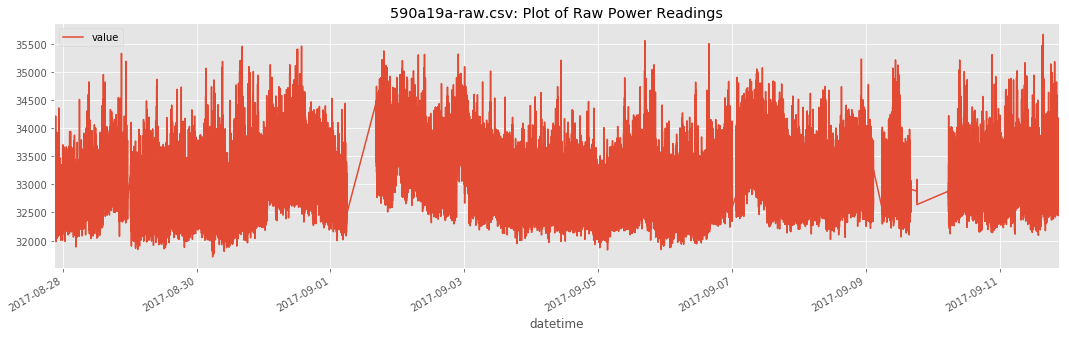

590a20a-raw.csv


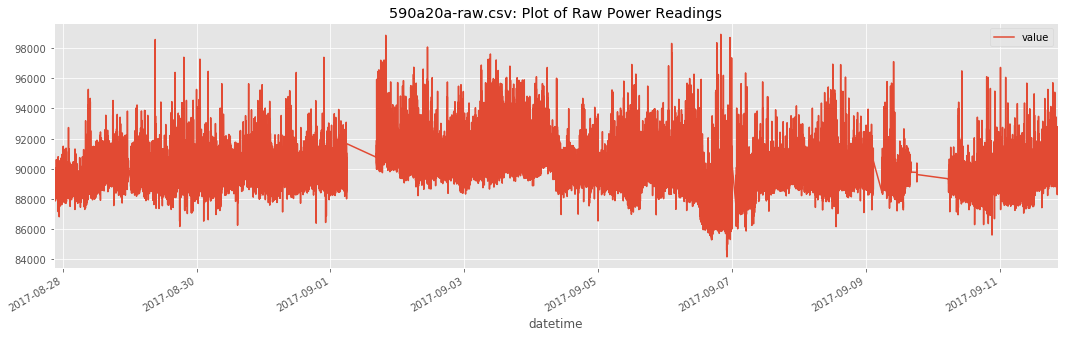

590a21a-raw.csv


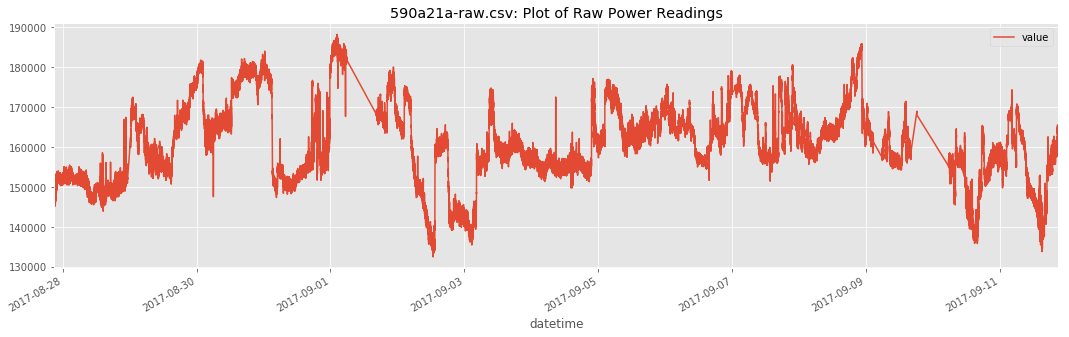

590a22a-raw.csv


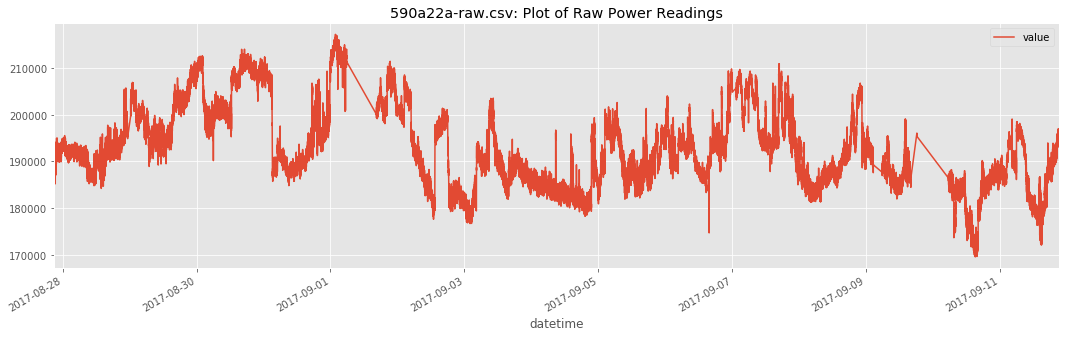

pdu-10 output-raw.csv


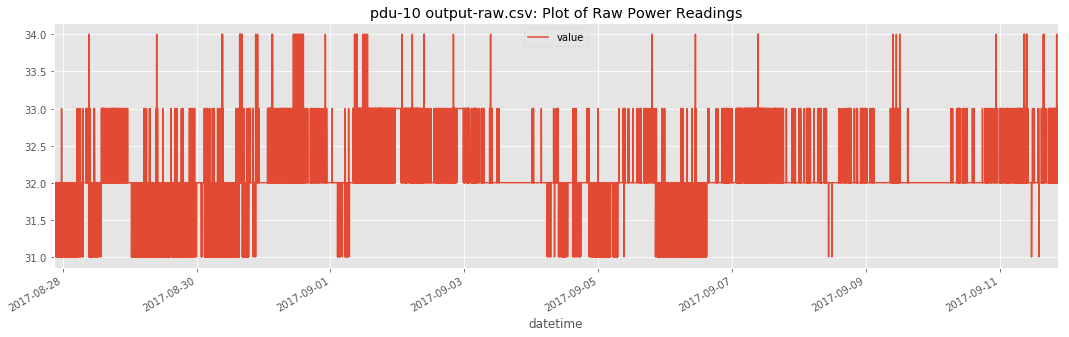

pdu-11 output-raw.csv


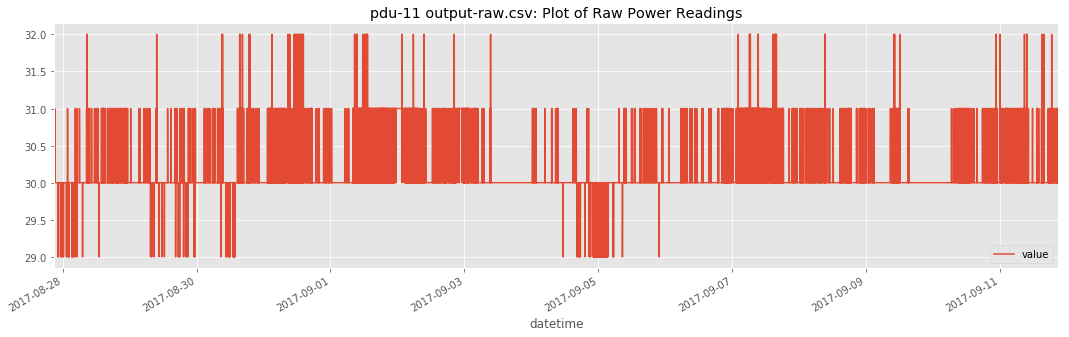

pdu-12 output-raw.csv


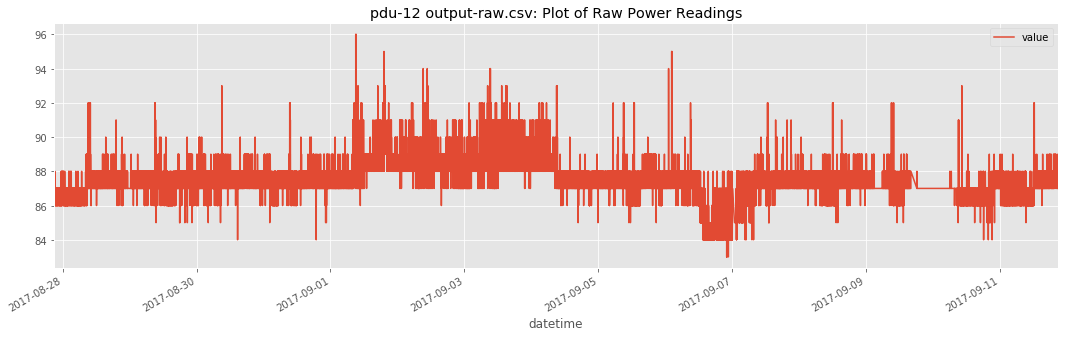

pdu-13 output-raw.csv


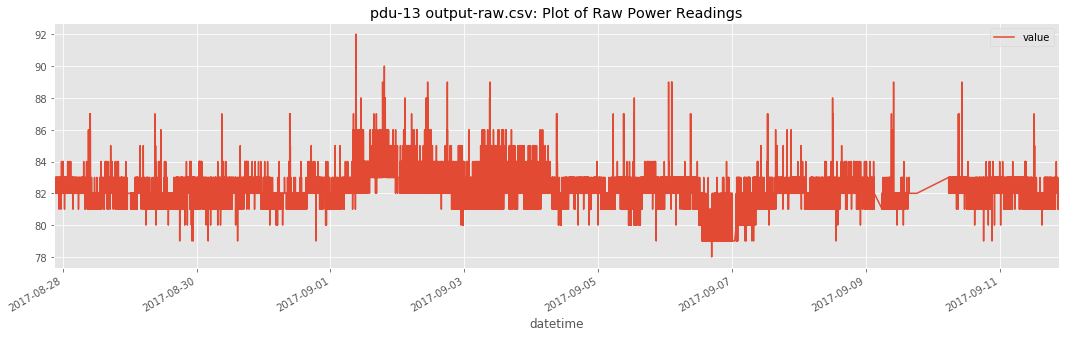

pdu-21 output-raw.csv


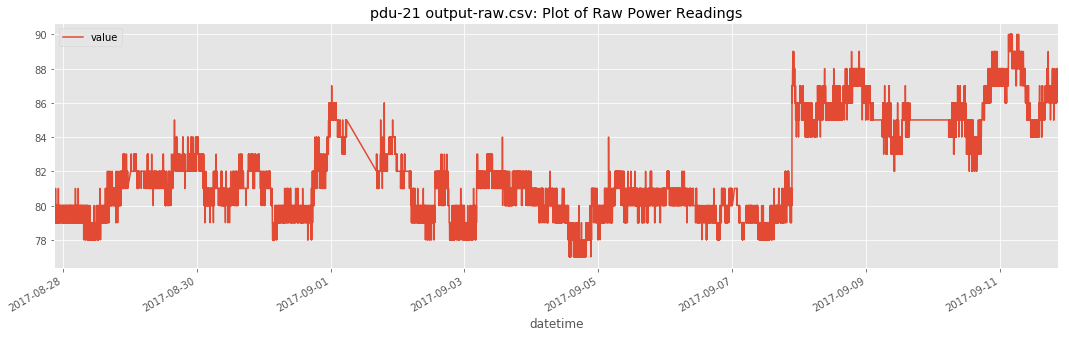

pdu-22 output-raw.csv


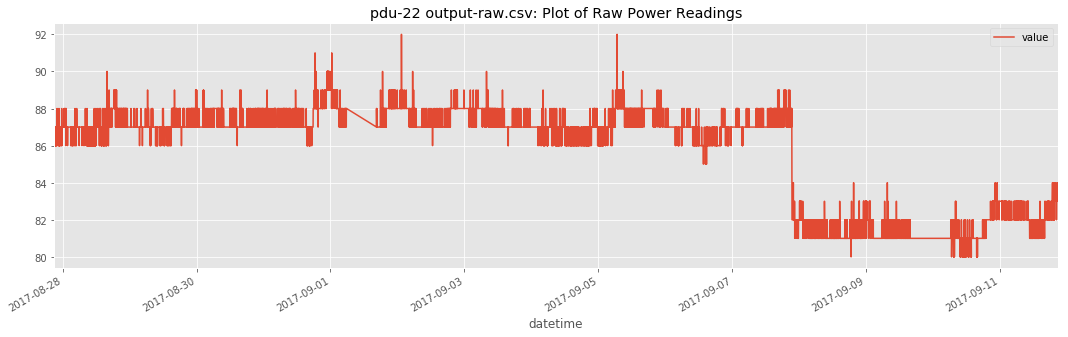

pdu-25 output-raw.csv


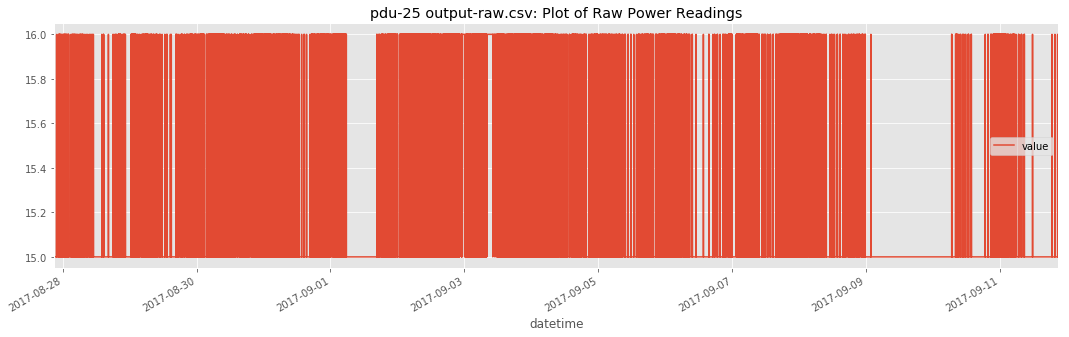

pdu-28 output-raw.csv


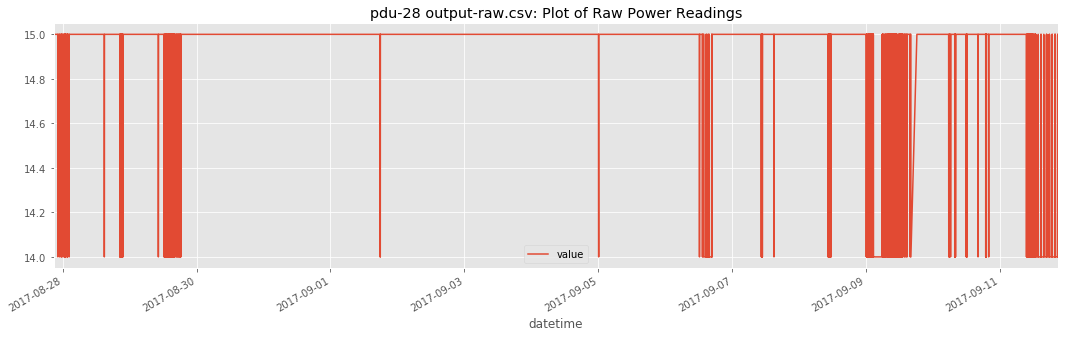

pdu-30 output-raw.csv


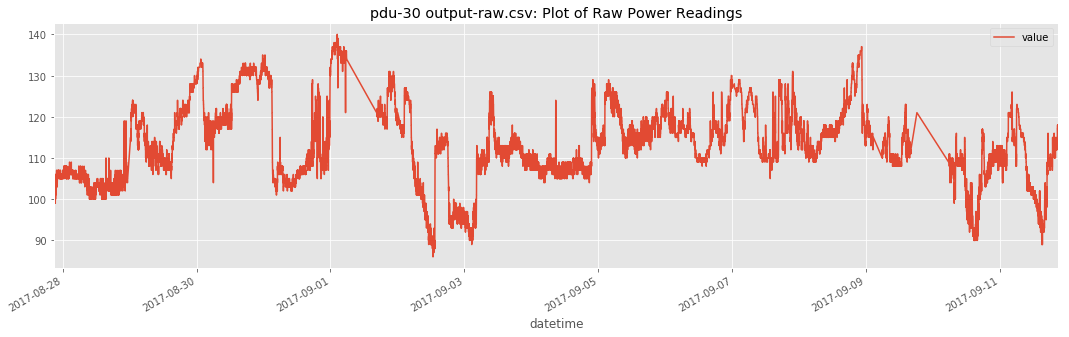

pdu-32 output-raw.csv


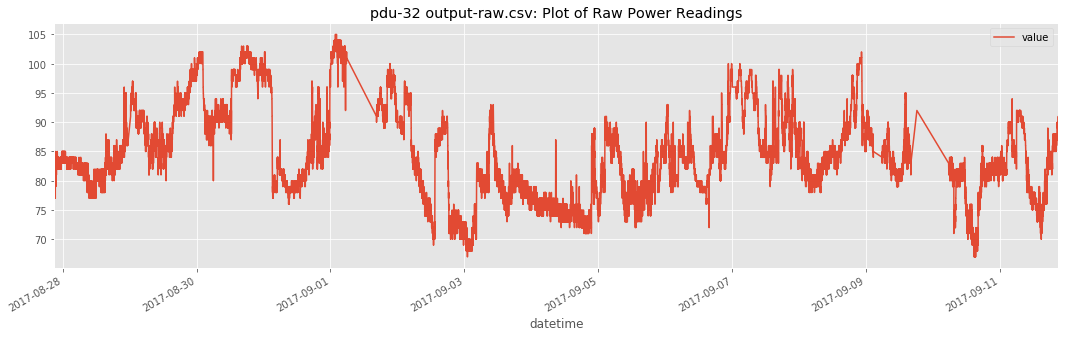

pdu-33 output-raw.csv


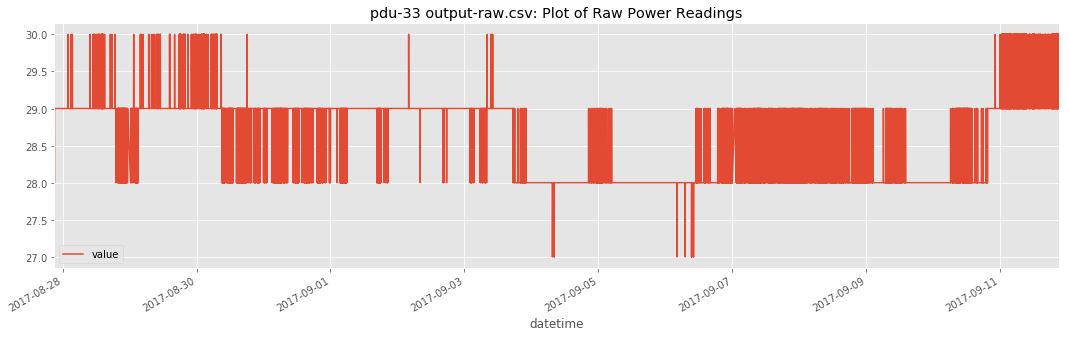

pdu-34 output-raw.csv


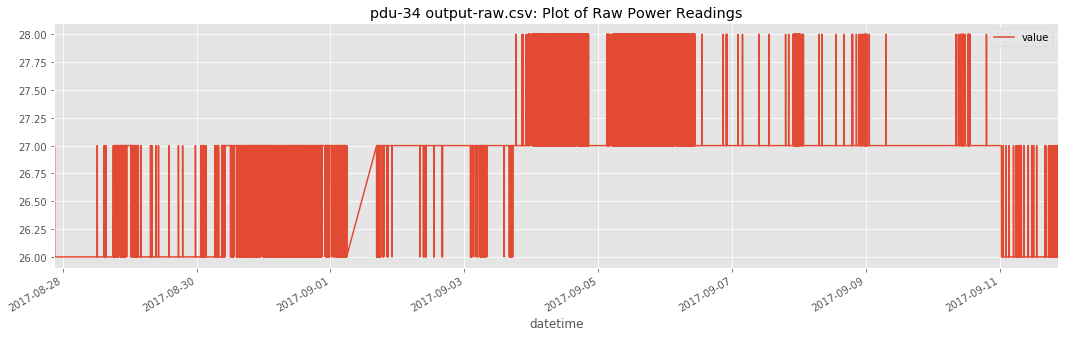

pdu-36 output-raw.csv


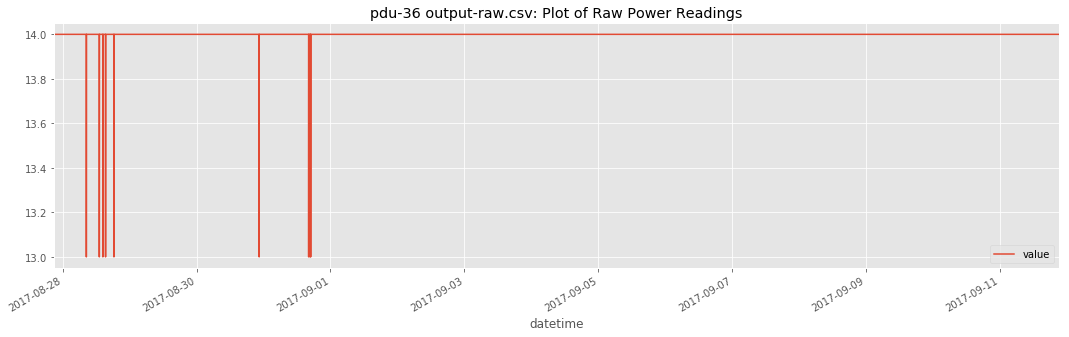

pdu-37 output-raw.csv


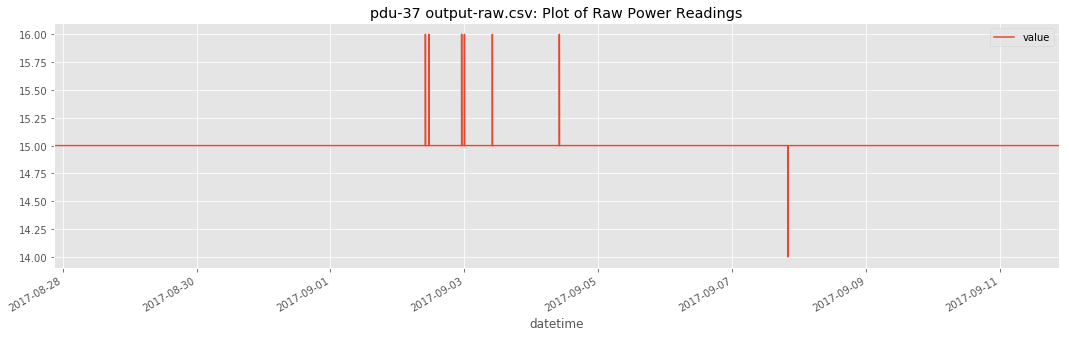

ups-1 output-raw.csv


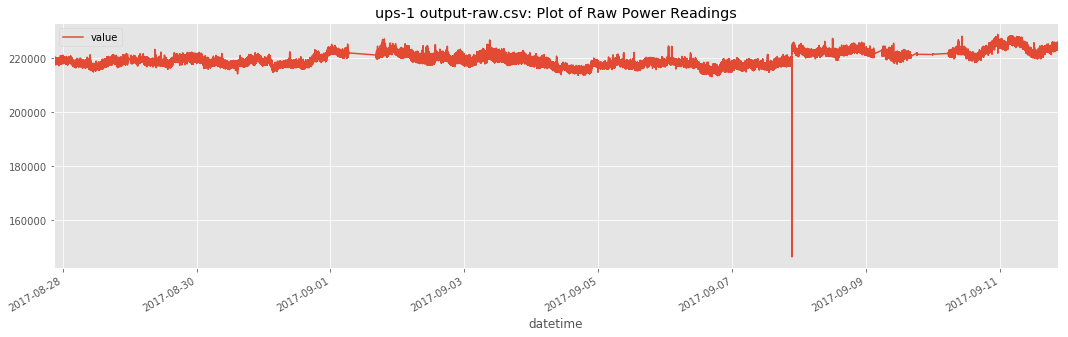

ups-2 output-raw.csv


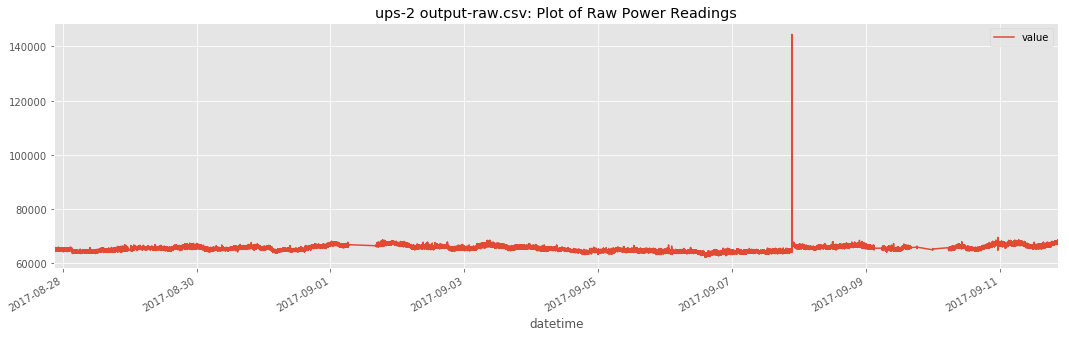

In [16]:
for fileName in files_raw:
    
    data = data.sort_index()
    data = TU.load_TS(fileName, folder)
    print(fileName)
    data.plot(figsize = (18,5), title=fileName +": Plot of Raw Power Readings")
    plt.show()

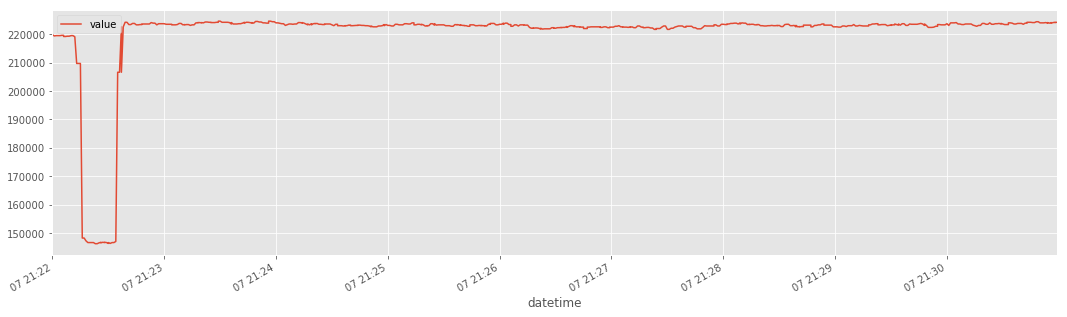

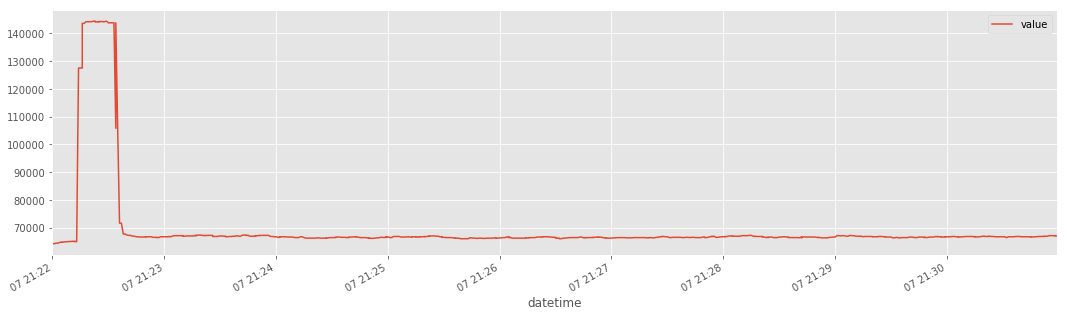

In [17]:
fileName = 'ups-1 output-raw.csv'
start = "2017-09-07 21:22"
end = "2017-09-07 21:30"

data = TU.load_TS(fileName,folder)
data = data.loc[start:end,:]
data.plot(figsize=(18,5))
plt.show()

fileName = 'ups-2 output-raw.csv'
start = "2017-09-07 21:22"
end = "2017-09-07 21:30"

data = TU.load_TS(fileName,folder)
data = data.loc[start:end,:]
data.plot(figsize=(18,5))
plt.show()

In [53]:
#metrics = {}
#for fileName in files_aggregated:
#    curr_meter = {}
#    data = TU.load_TS(fileName,folder)
#    metrics[fileName] = data_quality_analysis(pd.DataFrame(data["avg"]))
#    metrics[fileName]['max_min_diff'] = max_min_diff(data, output="count")
#    metrics[fileName]['max_min_diff_perc'] = max_min_diff(data, output="percentage")
#    
#results = pd.DataFrame.from_dict(metrics,orient='columns').T
#results

# NERSC_data2 Analysis

In [94]:
## read files in the folder and create lists and table
folder = "NERSC_data2"
files = os.listdir(folder)
files_aggregated = [fileName for fileName in files  if "-15min" in fileName]
files_raw = [fileName for fileName in files  if "-15min" not in fileName]
results_table = pd.DataFrame(files_aggregated, columns=["meter_file"])

In [95]:
## overall analysis

temp = pd.DataFrame()
metrics = {}
for fileName in files_aggregated:
    curr_meter = {}
    data = TU.load_TS(fileName,folder)
    temp = data
    metrics2[fileName] = data_quality_analysis(pd.DataFrame(data["avg"]))
    
    
results2 = pd.DataFrame.from_dict(metrics2,orient='columns').T
results2

first_valid missing_n missing_perc  \
590a19a-15min.csv        2017-09-14 21:45:00        25      1.73491   
590a20a-15min.csv        2017-09-14 21:30:00        25      1.73491   
590a21a-15min.csv        2017-09-14 21:45:00        25      1.73491   
590a22a-15min.csv        2017-09-14 21:45:00        25      1.73491   
pdu-10 output-15min.csv  2017-09-14 21:45:00        29      2.01249   
pdu-11 output-15min.csv  2017-09-14 21:45:00        29      2.01249   
pdu-12 output-15min.csv  2017-09-14 21:30:00        28       1.9431   
pdu-13 output-15min.csv  2017-09-14 21:45:00        29      2.01249   
pdu-21 output-15min.csv  2017-09-14 21:45:00        26       1.8043   
pdu-22 output-15min.csv  2017-09-14 21:30:00        26       1.8043   
pdu-25 output-15min.csv  2017-09-14 21:45:00        27       1.8737   
pdu-28 output-15min.csv  2017-09-14 21:30:00        26       1.8043   
pdu-30 output-15min.csv  2017-09-14 21:45:00        25      1.73491   
pdu-32 output-15min.csv  2017-09-14 21:45:00        27       1.8737   
pdu-33 output-15min.csv  2017-09-14 21:45:00        27       1.8737   
pdu-34 output-15min.csv  2017-09-14 21:45:00        27       1.8737   
pdu-36 output-15min.csv  2017-09-14 21:45:00        25      1.73491   
pdu-37 output-15min.csv  2017-09-14 21:45:00        26       1.8043   
ups-1 output-15min.csv   2017-09-14 21:30:00        28       1.9431   
ups-2 output-15min.csv   2017-09-14 21:45:00        27       1.8737   

                        negative_n negative_perc outliers_n outliers_perc  \
590a19a-15min.csv                0             0          7      0.485774   
590a20a-15min.csv                0             0          7      0.485774   
590a21a-15min.csv                0             0         32       2.22068   
590a22a-15min.csv                0             0          0             0   
pdu-10 output-15min.csv          0             0         72       4.99653   
pdu-11 output-15min.csv          0             0         52       3.60861   
pdu-12 output-15min.csv          0             0          7      0.485774   
pdu-13 output-15min.csv          0             0          8       0.55517   
pdu-21 output-15min.csv          0             0          5      0.346981   
pdu-22 output-15min.csv          0             0          0             0   
pdu-25 output-15min.csv          0             0         32       2.22068   
pdu-28 output-15min.csv          0             0          0             0   
pdu-30 output-15min.csv          0             0         31       2.15128   
pdu-32 output-15min.csv          0             0          0             0   
pdu-33 output-15min.csv          0             0          0             0   
pdu-34 output-15min.csv          0             0          0             0   
pdu-36 output-15min.csv          0             0         37       2.56766   
pdu-37 output-15min.csv          0             0         21       1.45732   
ups-1 output-15min.csv           0             0         10      0.693963   
ups-2 output-15min.csv           0             0          0             0   

                            period_length zero_n zero_perc  
590a19a-15min.csv        15 days 00:00:00      0         0  
590a20a-15min.csv        15 days 00:00:00      0         0  
590a21a-15min.csv        15 days 00:00:00      0         0  
590a22a-15min.csv        15 days 00:00:00      0         0  
pdu-10 output-15min.csv  15 days 00:00:00      0         0  
pdu-11 output-15min.csv  15 days 00:00:00      0         0  
pdu-12 output-15min.csv  15 days 00:00:00      0         0  
pdu-13 output-15min.csv  15 days 00:00:00      0         0  
pdu-21 output-15min.csv  15 days 00:00:00      0         0  
pdu-22 output-15min.csv  15 days 00:00:00      0         0  
pdu-25 output-15min.csv  15 days 00:00:00      0         0  
pdu-28 output-15min.csv  15 days 00:00:00      0         0  
pdu-30 output-15min.csv  15 days 00:00:00      0         0  
pdu-32 output-15min.csv  15 days 00:00:00      0         0  
pdu-33 o

590a19a-15min.csv


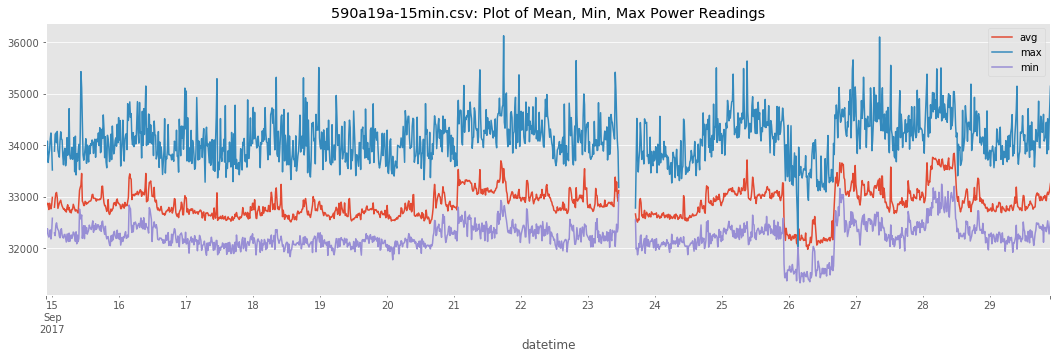

590a20a-15min.csv


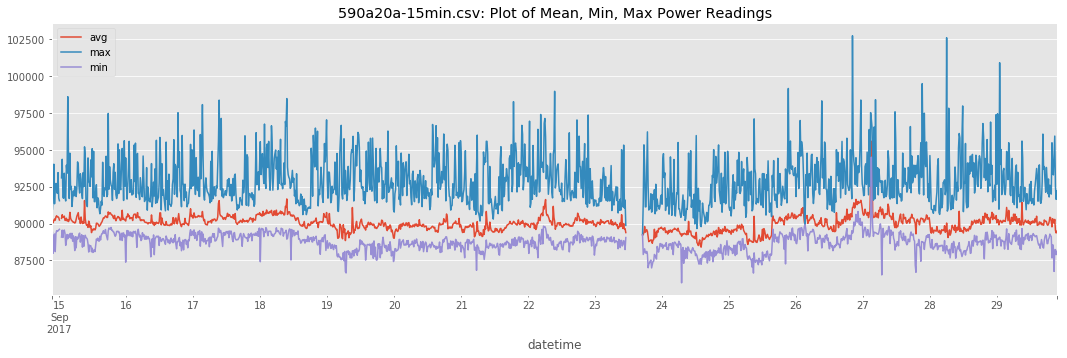

590a21a-15min.csv


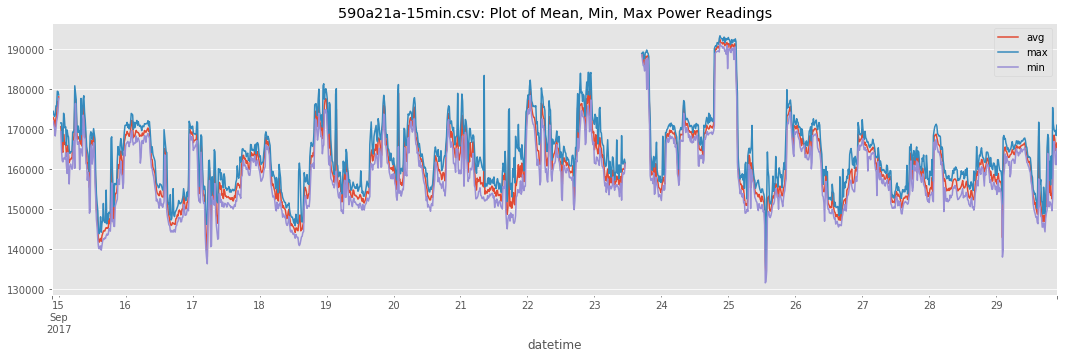

590a22a-15min.csv


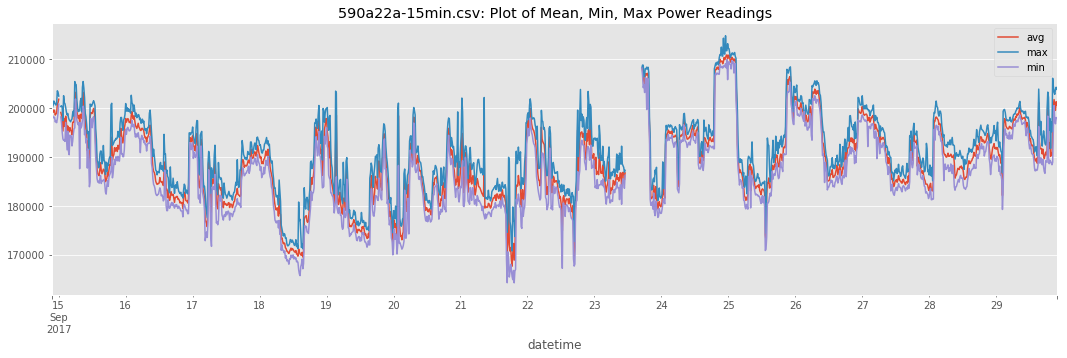

pdu-10 output-15min.csv


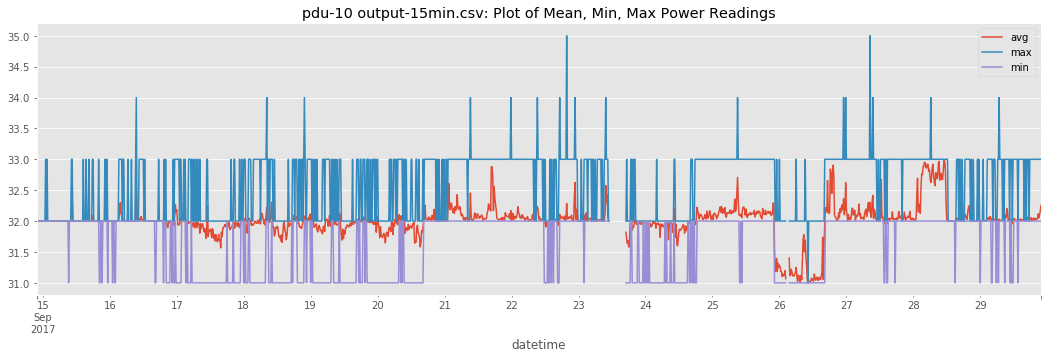

pdu-11 output-15min.csv


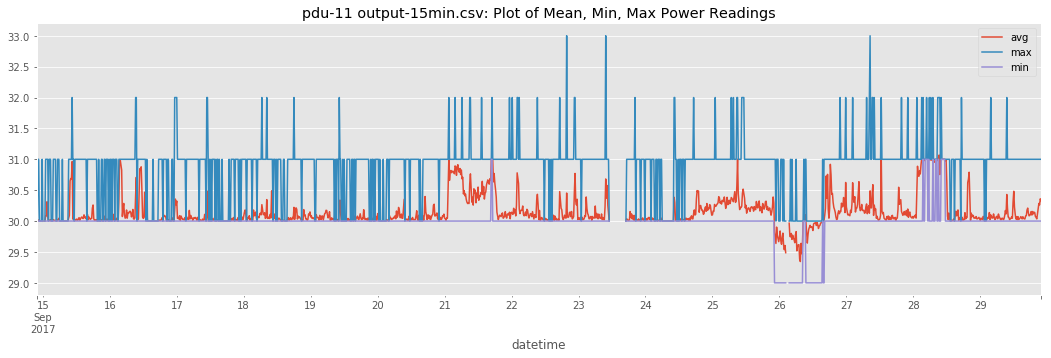

pdu-12 output-15min.csv


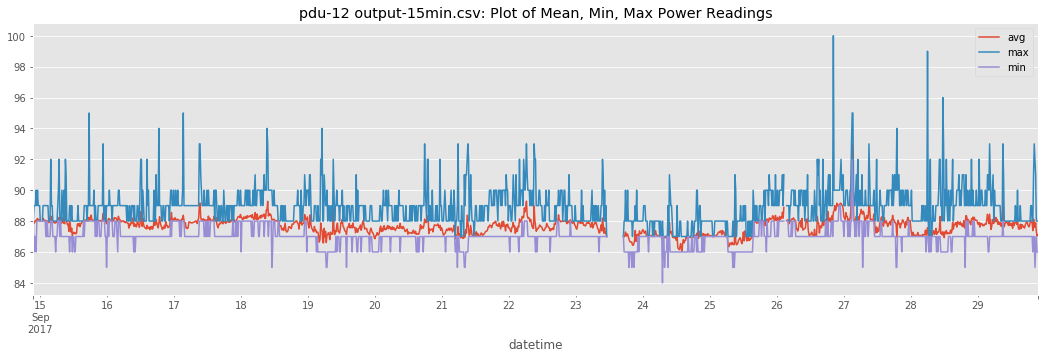

pdu-13 output-15min.csv


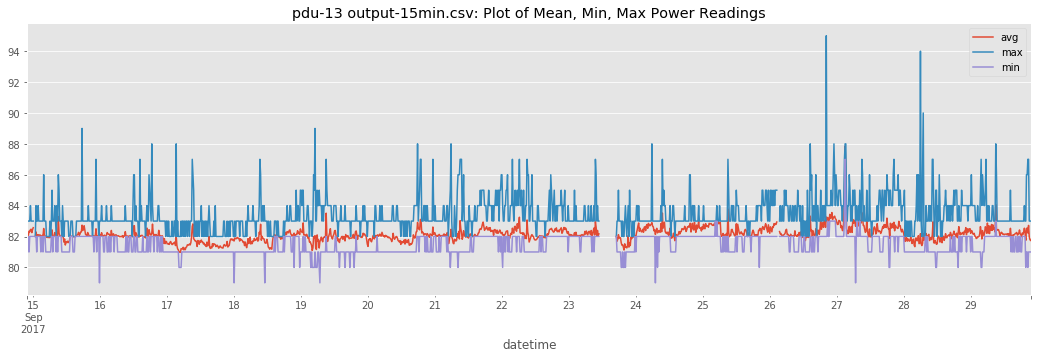

pdu-21 output-15min.csv


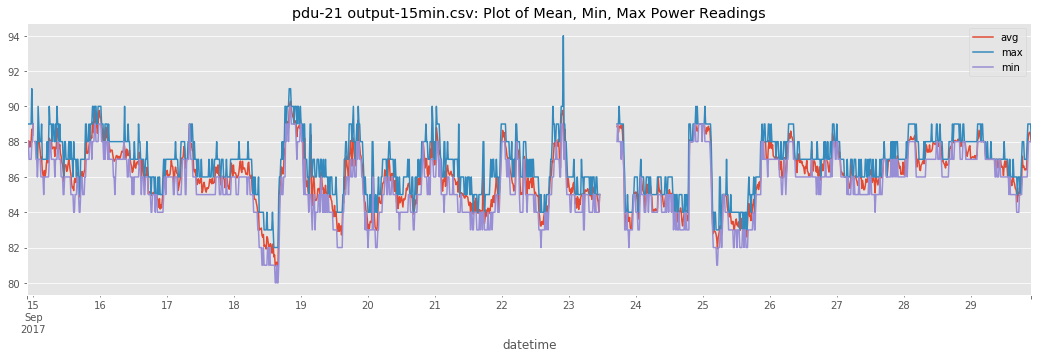

pdu-22 output-15min.csv


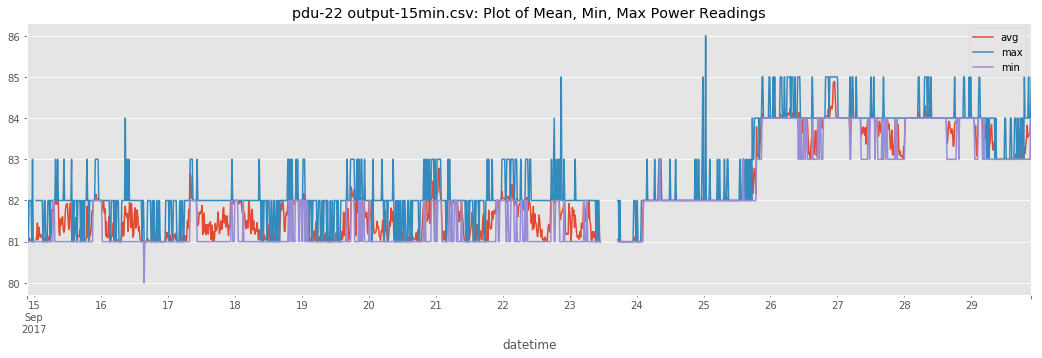

pdu-25 output-15min.csv


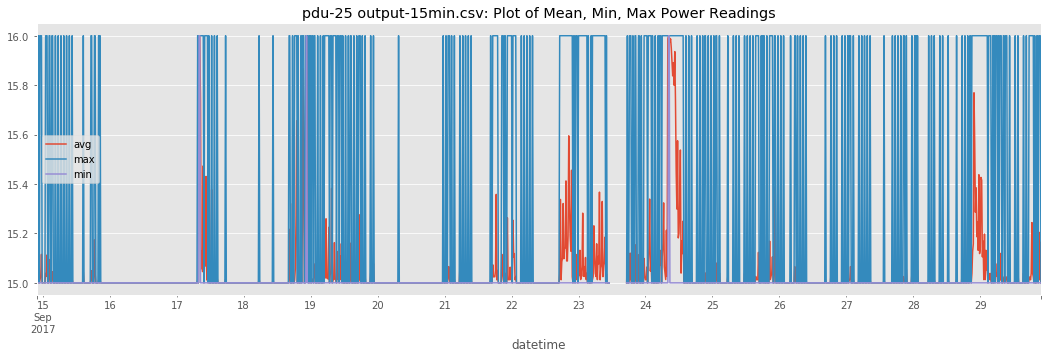

pdu-28 output-15min.csv


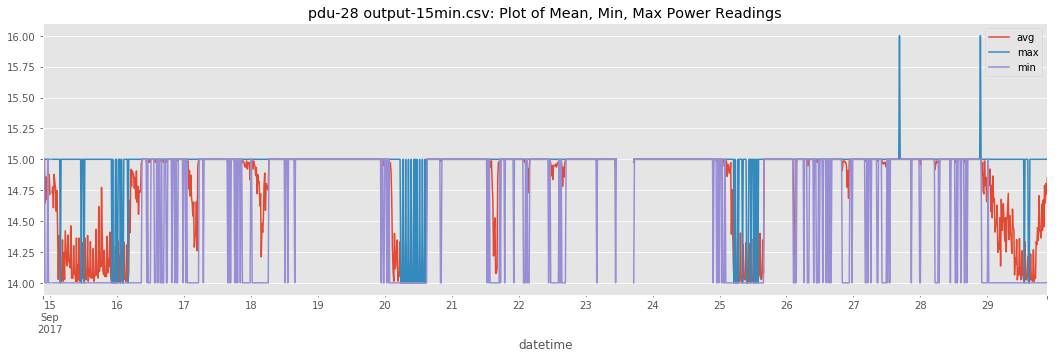

pdu-30 output-15min.csv


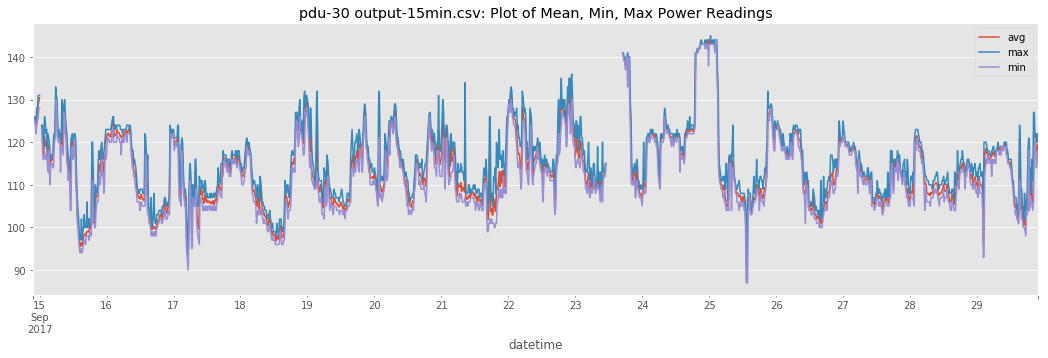

pdu-32 output-15min.csv


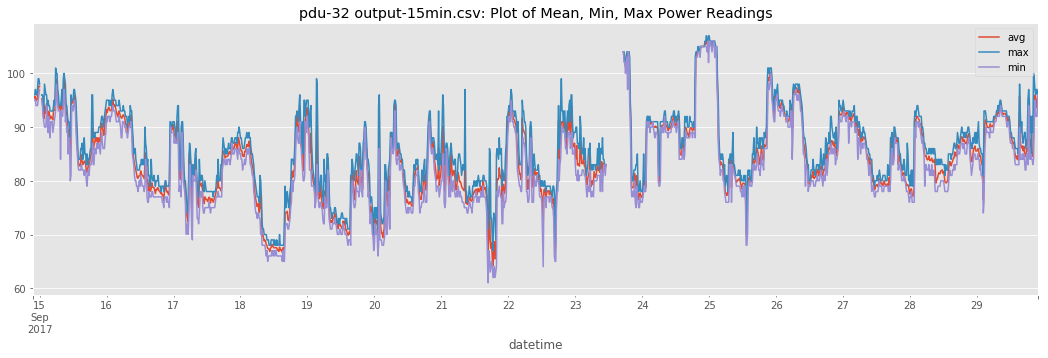

pdu-33 output-15min.csv


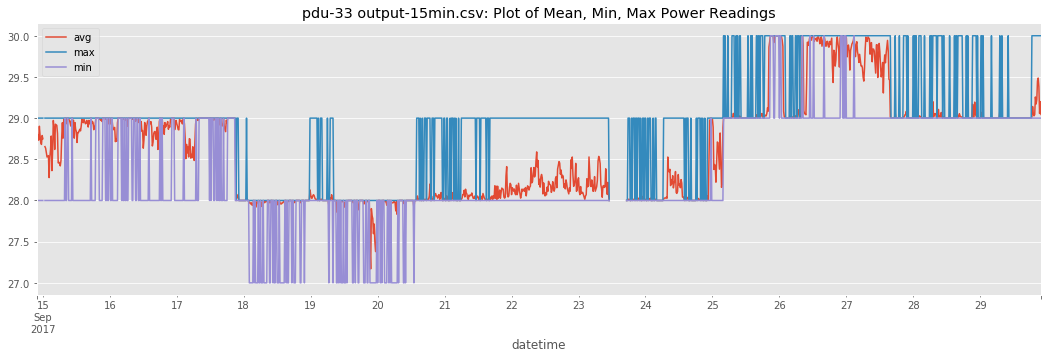

pdu-34 output-15min.csv


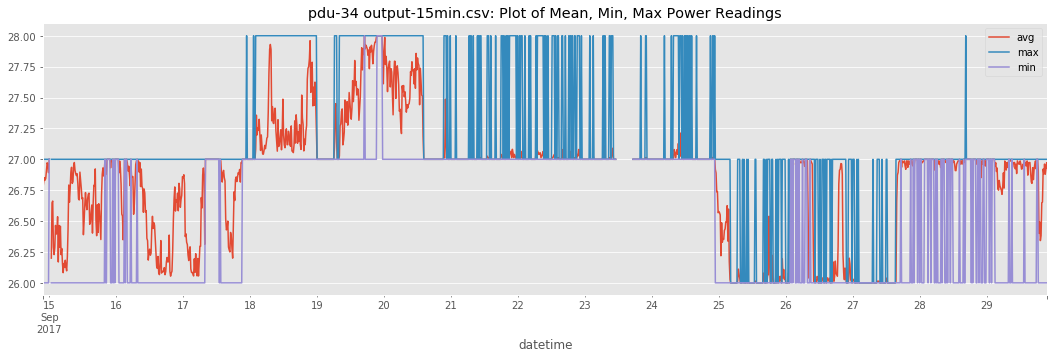

pdu-36 output-15min.csv


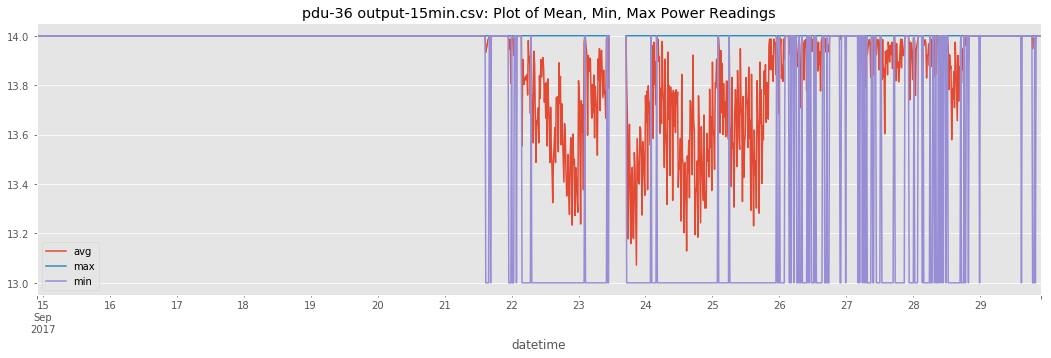

pdu-37 output-15min.csv


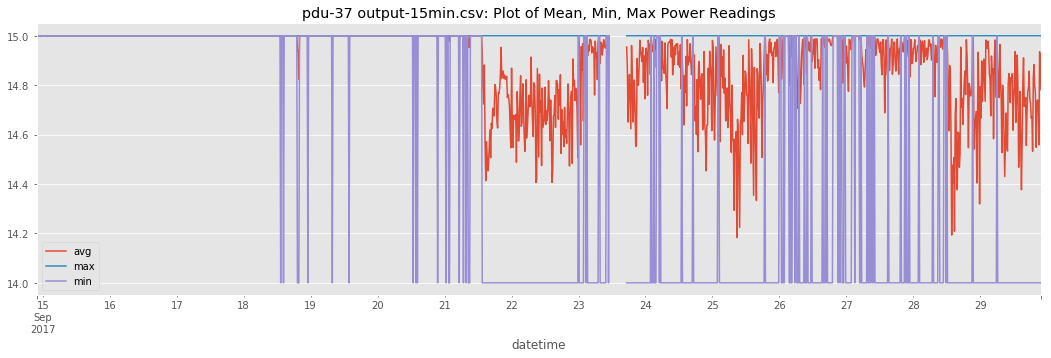

ups-1 output-15min.csv


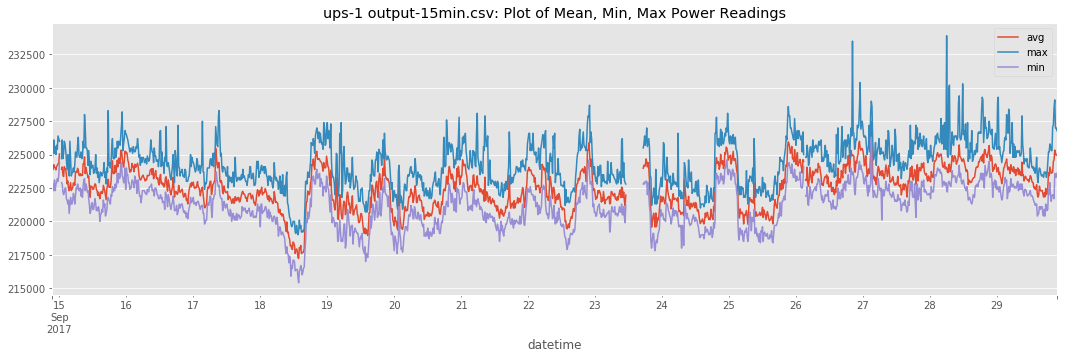

ups-2 output-15min.csv


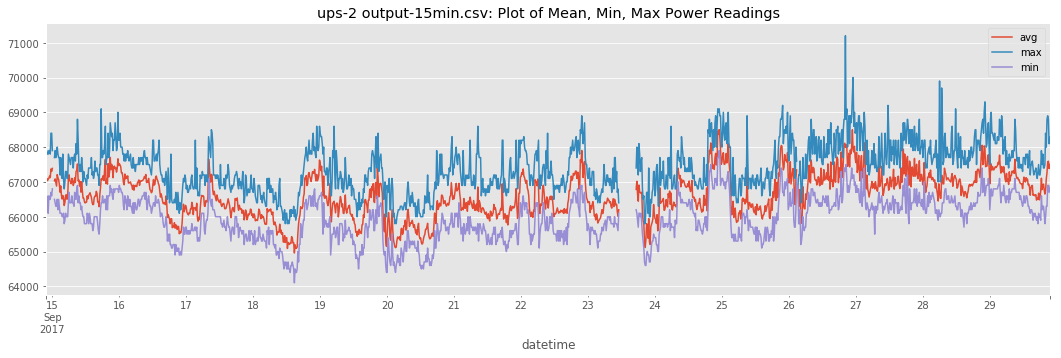

In [24]:
# dynamic analysis
for fileName in files_aggregated:
    data = TU.load_TS(fileName,folder)
    print(fileName)
    #plot_print_missing(data,fileName)
    #plt.show()
    #plot_sampling(data,fileName)
    #plt.show()
    plot_data_summary(data,fileName)
    #(data["max"]-data["min"]).plot(figsize=(18,5))
    plt.show()

# Raw Data

590a19a-raw.csv


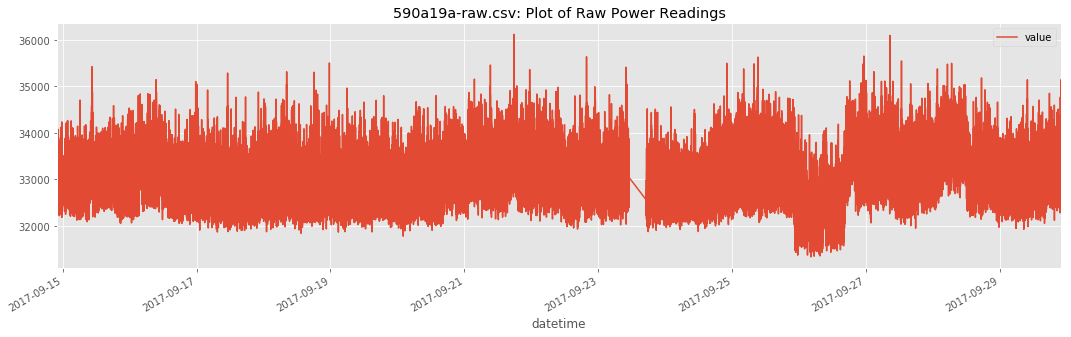

590a20a-raw.csv


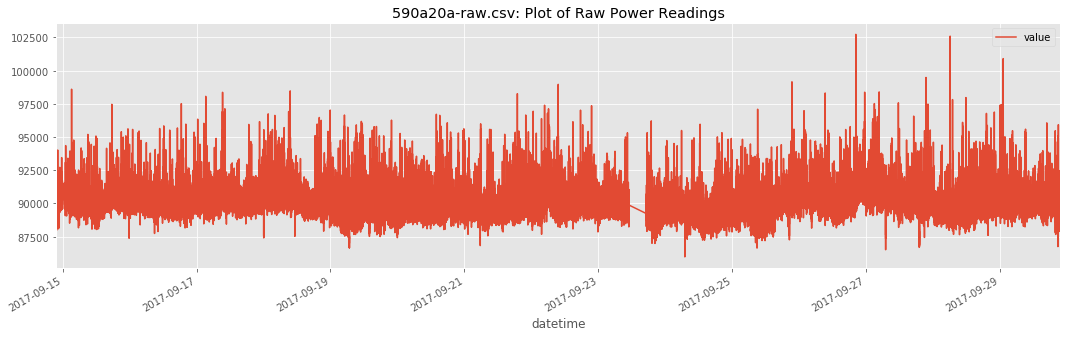

590a21a-raw.csv


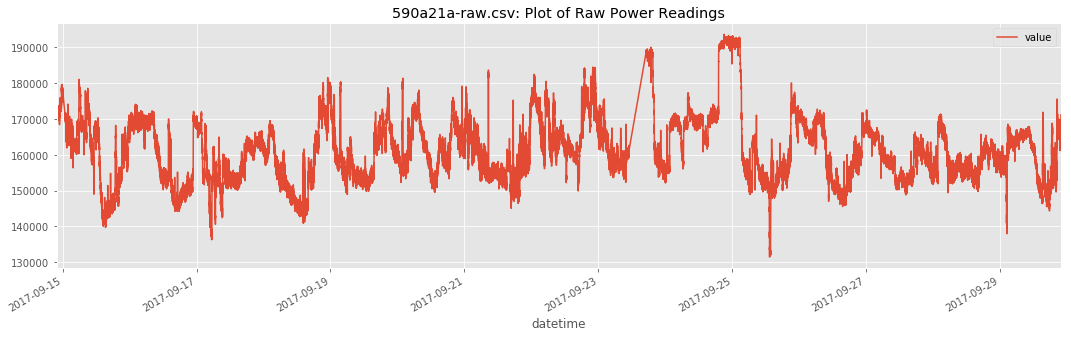

590a22a-raw.csv


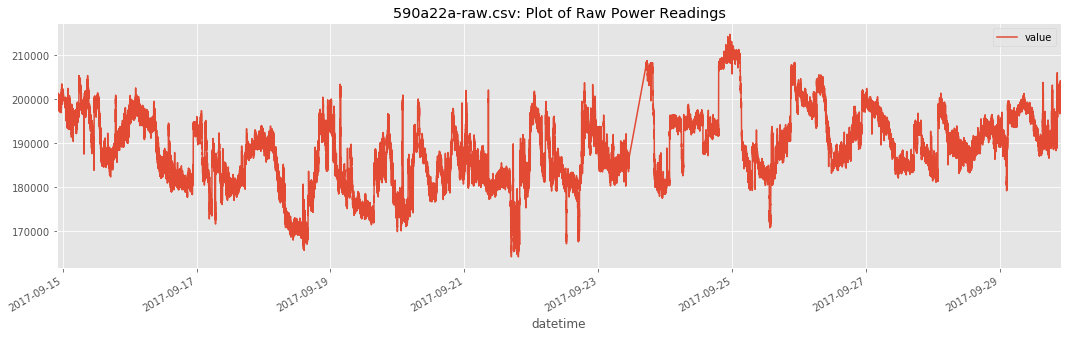

pdu-10 output-raw.csv


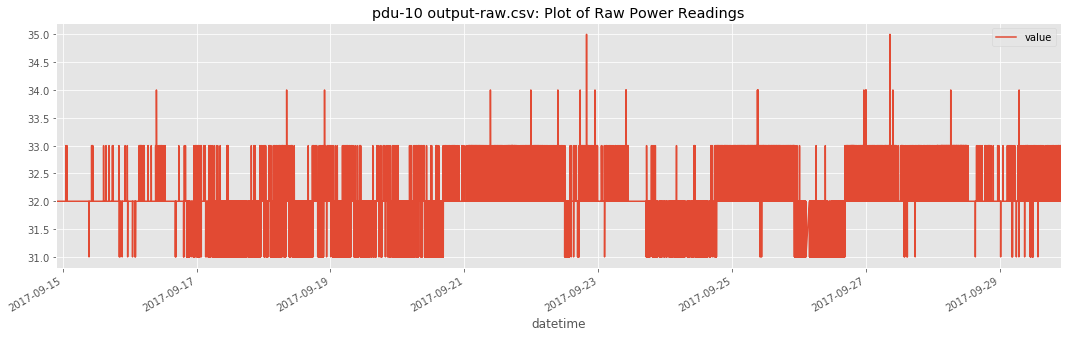

pdu-11 output-raw.csv


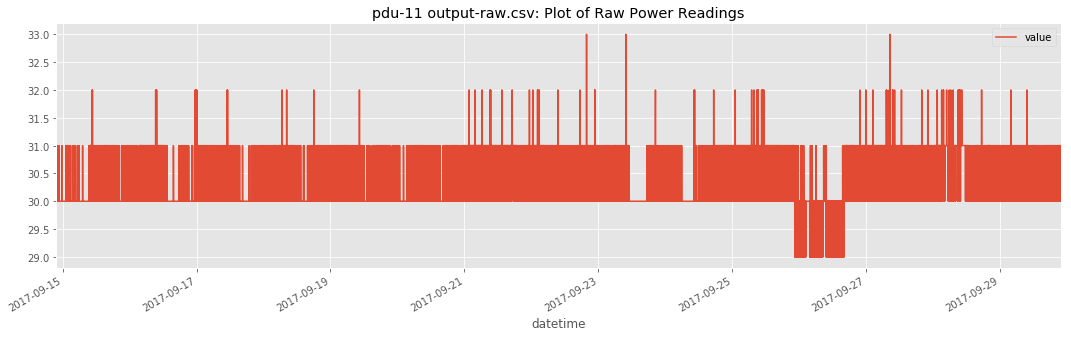

pdu-12 output-raw.csv


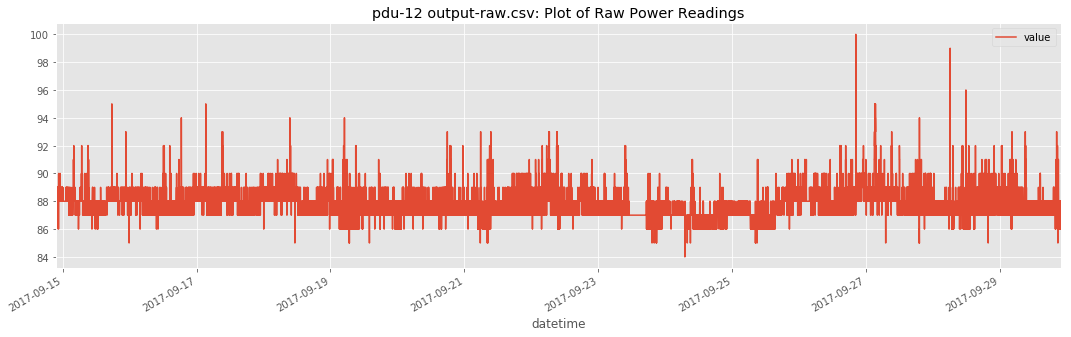

pdu-13 output-raw.csv


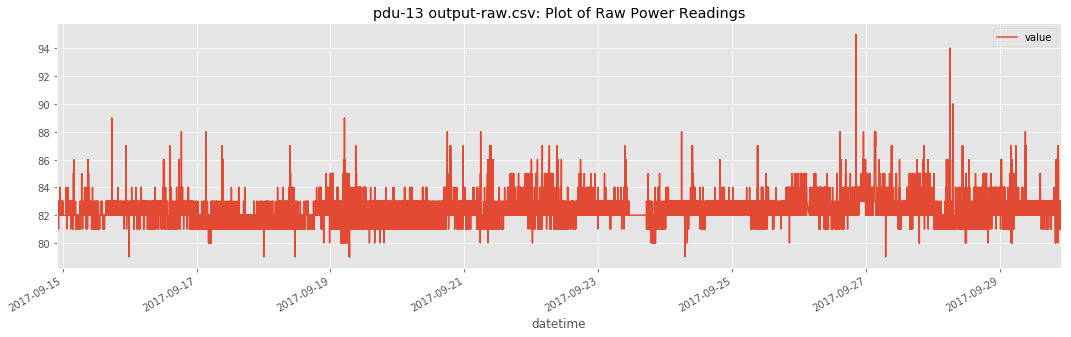

pdu-21 output-raw.csv


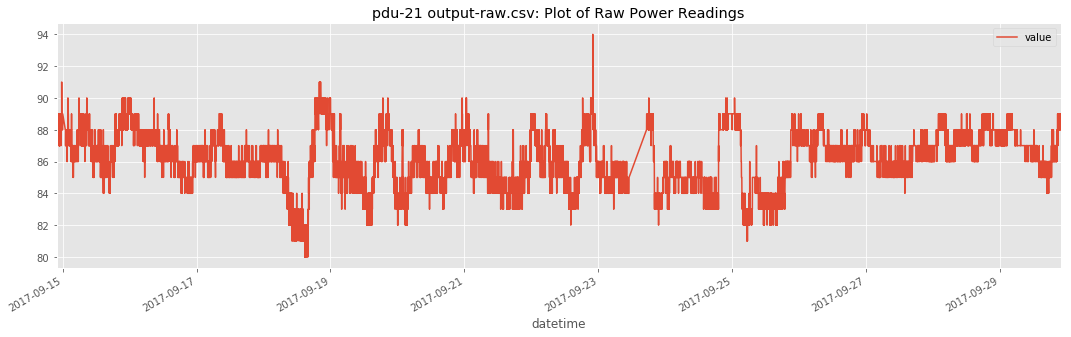

pdu-22 output-raw.csv


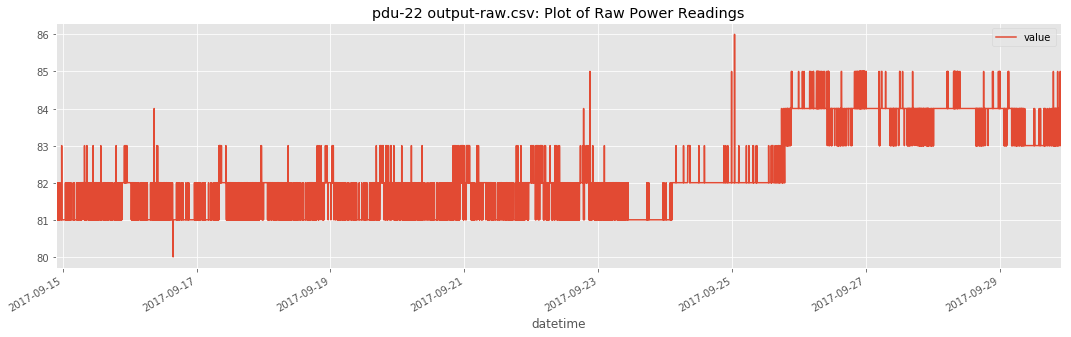

pdu-25 output-raw.csv


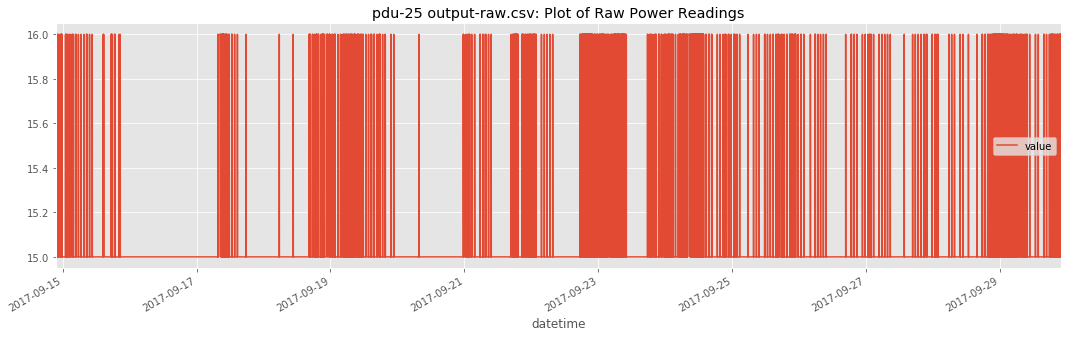

pdu-28 output-raw.csv


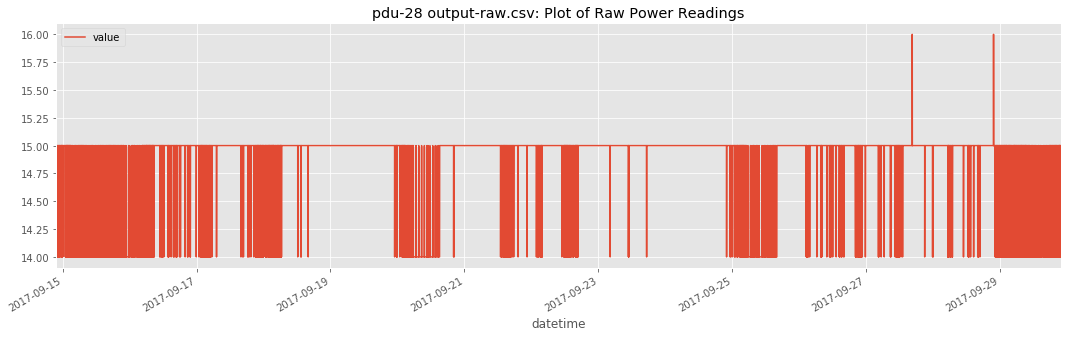

pdu-30 output-raw.csv


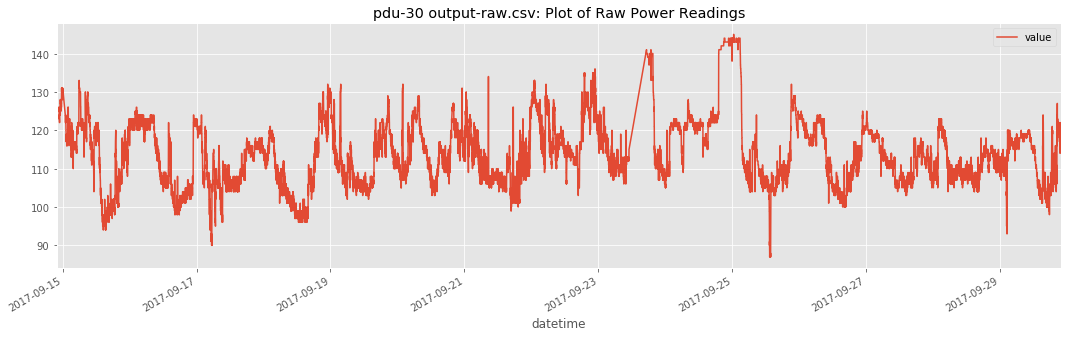

pdu-32 output-raw.csv


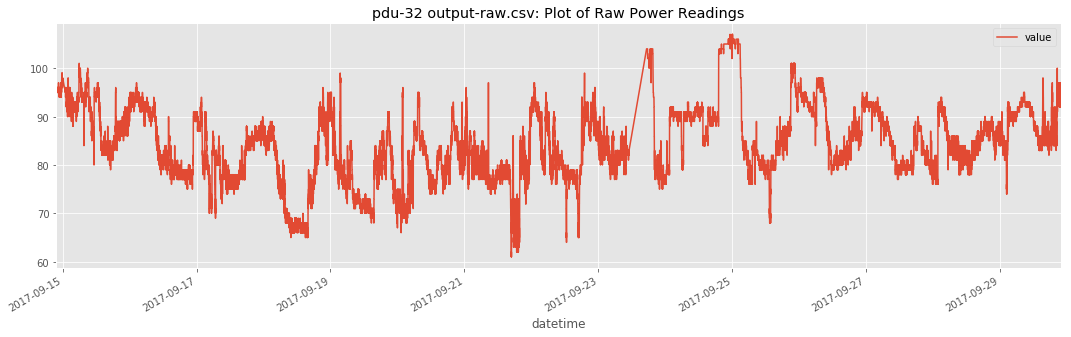

pdu-33 output-raw.csv


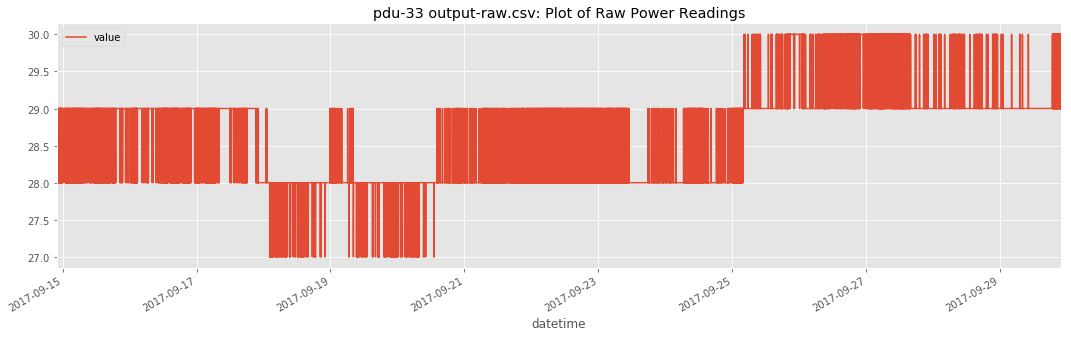

pdu-34 output-raw.csv


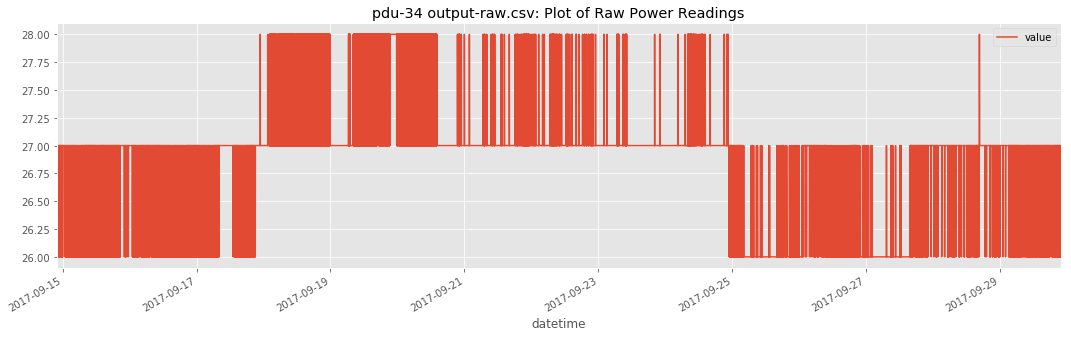

pdu-36 output-raw.csv


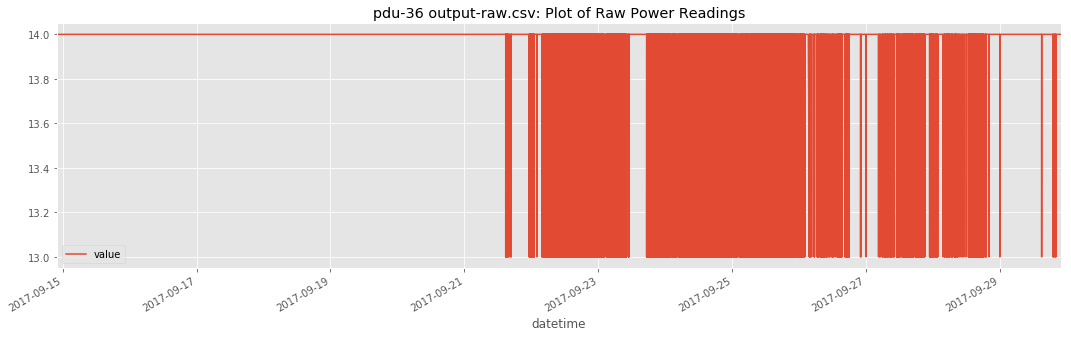

pdu-37 output-raw.csv


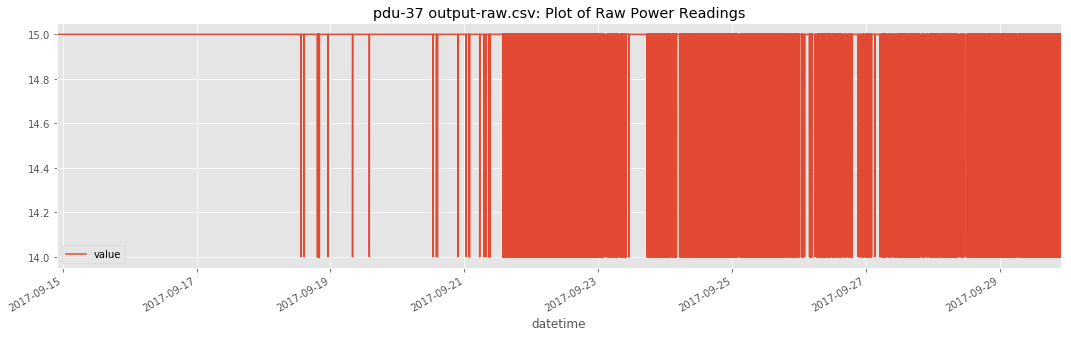

ups-1 output-raw.csv


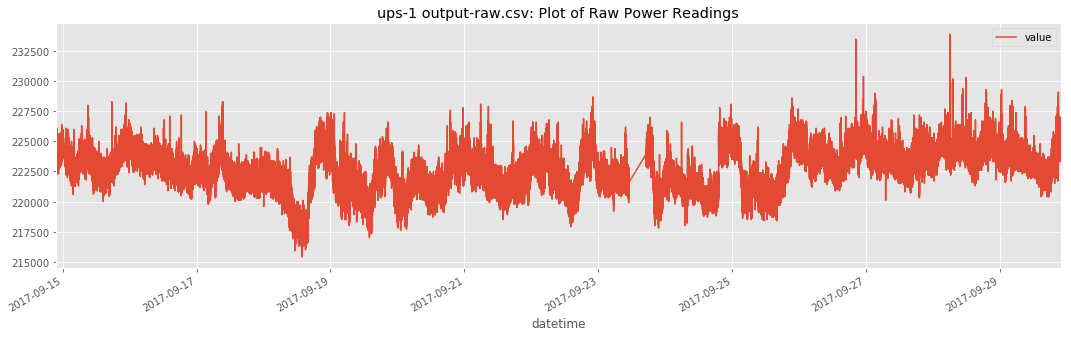

ups-2 output-raw.csv


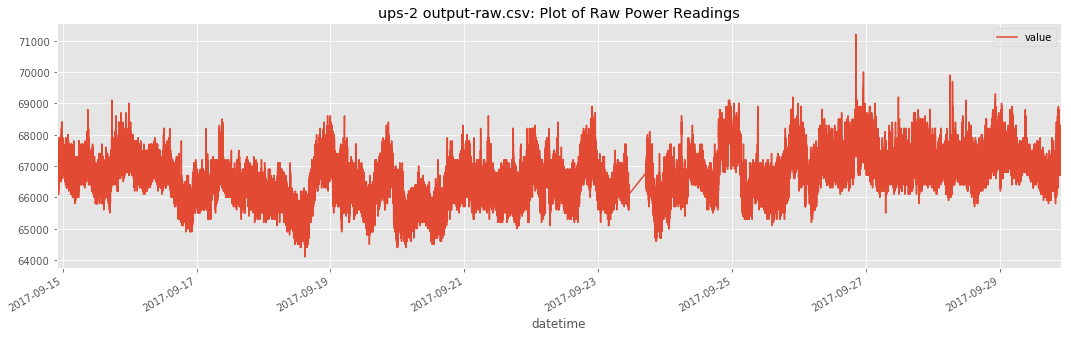

In [25]:
for fileName in files_raw:
    
    
    data = TU.load_TS(fileName, folder)
    data = data.sort_index()
    print(fileName)
    data.plot(figsize = (18,5), title=fileName +": Plot of Raw Power Readings")
    plt.show()

In [56]:
#metrics2 = {}
#for fileName in files_aggregated:
#    curr_meter = {}
#    data = TU.load_TS(fileName,folder)
#    metrics2[fileName] = data_quality_analysis(pd.DataFrame(data["avg"]))
#    metrics2[fileName]['max_min_diff'] = max_min_diff(data, output="count")
#    metrics2[fileName]['max_min_diff_perc'] = max_min_diff(data, output="percentage")
#    
#results2 = pd.DataFrame.from_dict(metrics2,orient='columns').T
#results2

# Comparison of the two dataset

In [96]:
results_full = results.join(results2, lsuffix="_1", rsuffix="_2")
results_full.sort_index(axis=1)

first_valid_1        first_valid_2 missing_n_1  \
590a19a-15min.csv        2017-08-27 20:45:00  2017-09-14 21:45:00         112   
590a20a-15min.csv        2017-08-27 20:45:00  2017-09-14 21:30:00         112   
590a21a-15min.csv        2017-08-27 20:45:00  2017-09-14 21:45:00         111   
590a22a-15min.csv        2017-08-27 20:45:00  2017-09-14 21:45:00         111   
pdu-10 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00          66   
pdu-11 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00          67   
pdu-12 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:30:00          69   
pdu-13 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00          69   
pdu-21 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00         111   
pdu-22 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:30:00         111   
pdu-25 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00         112   
pdu-28 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:30:00         112   
pdu-30 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00         110   
pdu-32 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00         112   
pdu-33 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00         111   
pdu-34 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00         111   
pdu-36 output-15min.csv  2017-08-27 20:45:00  2017-09-14 21:45:00         112   
pdu-37 output-15min.csv  2017-08-27 21:00:00  2017-09-14 21:45:00         111   
ups-1 output-15min.csv   2017-08-27 20:45:00  2017-09-14 21:30:00         104   
ups-2 output-15min.csv   2017-08-27 20:45:00  2017-09-14 21:45:00         104   

                        missing_n_2 missing_perc_1 missing_perc_2  \
590a19a-15min.csv                25        7.77238        1.73491   
590a20a-15min.csv                25        7.77238        1.73491   
590a21a-15min.csv                25        7.70298        1.73491   
590a22a-15min.csv                25        7.70298        1.73491   
pdu-10 output-15min.csv          29        4.58015        2.01249   
pdu-11 output-15min.csv          29        4.64955        2.01249   
pdu-12 output-15min.csv          28        4.78834         1.9431   
pdu-13 output-15min.csv          29        4.78834        2.01249   
pdu-21 output-15min.csv          26        7.70298         1.8043   
pdu-22 output-15min.csv          26        7.70298         1.8043   
pdu-25 output-15min.csv          27        7.77238         1.8737   
pdu-28 output-15min.csv          26        7.77238         1.8043   
pdu-30 output-15min.csv          25        7.63359        1.73491   
pdu-32 output-15min.csv          27        7.77238         1.8737   
pdu-33 output-15min.csv          27        7.70298         1.8737   
pdu-34 output-15min.csv          27        7.70298         1.8737   
pdu-36 output-15min.csv          25        7.77238        1.73491   
pdu-37 output-15min.csv          26        7.70833         1.8043   
ups-1 output-15min.csv           28        7.21721         1.9431   
ups-2 output-15min.csv           27        7.21721         1.8737   

                        negative_n_1 negative_n_2 negative_perc_1  \
590a19a-15min.csv                  0            0               0   
590a20a-15min.csv                  0            0               0   
590a21a-15min.csv                  0            0               0   
590a22a-15min.csv                  0            0               0   
pdu-10 output-15min.csv            0            0               0   
pdu-11 output-15min.csv            0            0               0   
pdu-12 output-15min.csv            0            0               0   
pdu-13 output-15min.csv            0            0               0   
pdu-21 output-15min.csv            0            0               0   
pdu-22 output-15min.csv            0            0               0   
pdu-25 output-15min.csv            0            0               0   
pdu-28 output-15min.csv            0            0  

In [97]:
results - results2

first_valid missing_n missing_perc negative_n  \
590a19a-15min.csv        -19 days +23:00:00        87      6.03747          0   
590a20a-15min.csv        -19 days +23:15:00        87      6.03747          0   
590a21a-15min.csv        -19 days +23:00:00        86      5.96808          0   
590a22a-15min.csv        -19 days +23:00:00        86      5.96808          0   
pdu-10 output-15min.csv  -19 days +23:00:00        37      2.56766          0   
pdu-11 output-15min.csv  -19 days +23:00:00        38      2.63706          0   
pdu-12 output-15min.csv  -19 days +23:15:00        41      2.84525          0   
pdu-13 output-15min.csv  -19 days +23:00:00        40      2.77585          0   
pdu-21 output-15min.csv  -19 days +23:00:00        85      5.89868          0   
pdu-22 output-15min.csv  -19 days +23:15:00        85      5.89868          0   
pdu-25 output-15min.csv  -19 days +23:00:00        85      5.89868          0   
pdu-28 output-15min.csv  -19 days +23:15:00        86      5.96808          0   
pdu-30 output-15min.csv  -19 days +23:00:00        85      5.89868          0   
pdu-32 output-15min.csv  -19 days +23:00:00        85      5.89868          0   
pdu-33 output-15min.csv  -19 days +23:00:00        84      5.82929          0   
pdu-34 output-15min.csv  -19 days +23:00:00        84      5.82929          0   
pdu-36 output-15min.csv  -19 days +23:00:00        87      6.03747          0   
pdu-37 output-15min.csv  -19 days +23:15:00        85      5.90403          0   
ups-1 output-15min.csv   -19 days +23:15:00        76      5.27412          0   
ups-2 output-15min.csv   -19 days +23:00:00        77      5.34351          0   

                        negative_perc outliers_n outliers_perc  \
590a19a-15min.csv                   0          1     0.0693963   
590a20a-15min.csv                   0         23       1.59611   
590a21a-15min.csv                   0        -32      -2.22068   
590a22a-15min.csv                   0          0             0   
pdu-10 output-15min.csv             0        -29      -2.01249   
pdu-11 output-15min.csv             0          1     0.0693963   
pdu-12 output-15min.csv             0         19       1.31853   
pdu-13 output-15min.csv             0         29       2.01249   
pdu-21 output-15min.csv             0         -5     -0.346981   
pdu-22 output-15min.csv             0          0             0   
pdu-25 output-15min.csv             0        -32      -2.22068   
pdu-28 output-15min.csv             0         56       3.88619   
pdu-30 output-15min.csv             0        -31      -2.15128   
pdu-32 output-15min.csv             0          0             0   
pdu-33 output-15min.csv             0          0             0   
pdu-34 output-15min.csv             0          0             0   
pdu-36 output-15min.csv             0        -28       -1.9431   
pdu-37 output-15min.csv             0        -14      -0.97121   
ups-1 output-15min.csv              0         -7     -0.485774   
ups-2 output-15min.csv              0          0             0   

                             period_length zero_n zero_perc  
590a19a-15min.csv          0 days 00:00:00      0         0  
590a20a-15min.csv          0 days 00:00:00      0         0  
590a21a-15min.csv          0 days 00:00:00      0         0  
590a22a-15min.csv          0 days 00:00:00      0         0  
pdu-10 output-15min.csv    0 days 00:00:00      0         0  
pdu-11 output-15min.csv    0 days 00:00:00      0         0  
pdu-12 output-15min.csv    0 days 00:00:00      0         0  
pdu-13 output-15min.csv    0 days 00:00:00      0         0  
pdu-21 output-15min.csv    0 days 00:00:00      0         0  
pdu-22 output-15min.csv    0 days 00:00:00      0         0  
pdu-25 output-15min.csv    0 days 00:00:00      0         0  
pdu-28 output-15min.csv    0 days 00:00:00      0         0  
pdu-30 output-15min.csv    0 days 00:00:00      0         0  
pdu-32 output-15min.csv    0 days 00:00:00      0         0  
pdu-33 output